In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from plotly.offline import iplot, init_notebook_mode
import pickle
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
from datetime import datetime
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [99]:

path = '../../../Atliq Marts Challenge'
fact_order_lines_df=pd.read_csv(path+"/fact_order_lines.csv")
# fact_orders_aggregate_df=pd.read_csv("Atliq Marts Challenge/fact_orders_aggregate.csv")

dim_date=pd.read_csv(path+"/dim_date.csv")
dim_customers=pd.read_csv(path+"/dim_customers.csv")
dim_products=pd.read_csv(path+"/dim_products.csv")
dim_targets_orders=pd.read_csv(path+"/dim_targets_orders.csv")

dim_date=pd.read_csv(path+"/dim_date.csv")

dim_date = dim_date.rename(columns={'date': 'agreed_delivery_date','mmm_yy': 'agreed_delivery_mmm_yy','week_no': 'agreed_delivery_week_no'})


In [100]:
# result =  pd.concat([fact_order_lines_df, fact_orders_aggregate_df], axis=1,join="outer")
# result =pd.merge( fact_order_lines_df, fact_orders_aggregate_df, on=["order_id", "customer_id"])
# esult =pd.merge( fact_order_lines_df, fact_orders_aggregate_df, on=["order_id", "customer_id"])
result =pd.merge( fact_order_lines_df ,dim_customers , how="outer",on=["customer_id"])
result =pd.merge( result ,dim_products , how="outer",on=["product_id"])
train_SC =pd.merge( result ,dim_targets_orders , how="outer",on=["customer_id"])
train_SC =pd.merge( result ,dim_targets_orders , how="outer",on=["customer_id"])
train_SC =pd.merge( result ,dim_date , how="outer",on=["agreed_delivery_date"])

In [101]:
train_SC.columns = [col.lower().replace(' ', '_') for col in train_SC.columns]
train_SC.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)
train_SC.rename(columns=lambda x: x.replace("%", "_percent"), inplace=True)

In [102]:
train_SC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57097 entries, 0 to 57096
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 57096 non-null  object 
 1   order_placement_date     57096 non-null  object 
 2   customer_id              57096 non-null  float64
 3   product_id               57096 non-null  float64
 4   order_qty                57096 non-null  float64
 5   agreed_delivery_date     57097 non-null  object 
 6   actual_delivery_date     57096 non-null  object 
 7   delivery_qty             57096 non-null  float64
 8   in_full                  57096 non-null  float64
 9   on_time                  57096 non-null  float64
 10  on_time_in_full          57096 non-null  float64
 11  customer_name            57096 non-null  object 
 12  city                     57096 non-null  object 
 13  product_name             57096 non-null  object 
 14  category              

In [103]:
# train_SC[train_SC['customer_id'] == 789201].to_csv('output789201.csv', index=False)

In [104]:
df = train_SC[(train_SC['product_id'] == 25891201)|(train_SC['product_id'] == 25891202)|(train_SC['product_id'] == 25891203)] 
# df = train_SC[(train_SC['customer_id'] == 789201) & (train_SC['product_id'] == 25891103)] 

df1 = train_SC[(train_SC['product_id'] == 25891201)] 
df2 = train_SC[(train_SC['product_id'] == 25891202)] 
df3 = train_SC[(train_SC['product_id'] == 25891203)] 


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9567 entries, 0 to 57001
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 9567 non-null   object 
 1   order_placement_date     9567 non-null   object 
 2   customer_id              9567 non-null   float64
 3   product_id               9567 non-null   float64
 4   order_qty                9567 non-null   float64
 5   agreed_delivery_date     9567 non-null   object 
 6   actual_delivery_date     9567 non-null   object 
 7   delivery_qty             9567 non-null   float64
 8   in_full                  9567 non-null   float64
 9   on_time                  9567 non-null   float64
 10  on_time_in_full          9567 non-null   float64
 11  customer_name            9567 non-null   object 
 12  city                     9567 non-null   object 
 13  product_name             9567 non-null   object 
 14  category               

In [106]:
# Convert 'actual_delivery_date' to datetime format

df['agreed_delivery_date_formatted'] = pd.to_datetime(df['agreed_delivery_date'], format='%d-%b-%y')
df = df.sort_values(by='agreed_delivery_date_formatted')


df1['agreed_delivery_date_formatted'] = pd.to_datetime(df1['agreed_delivery_date'], format='%d-%b-%y')
df1 = df1.sort_values(by='agreed_delivery_date_formatted')
df2['agreed_delivery_date_formatted'] = pd.to_datetime(df2['agreed_delivery_date'], format='%d-%b-%y')
df2 = df2.sort_values(by='agreed_delivery_date_formatted')
df3['agreed_delivery_date_formatted'] = pd.to_datetime(df3['agreed_delivery_date'], format='%d-%b-%y')
df3 = df3.sort_values(by='agreed_delivery_date_formatted')


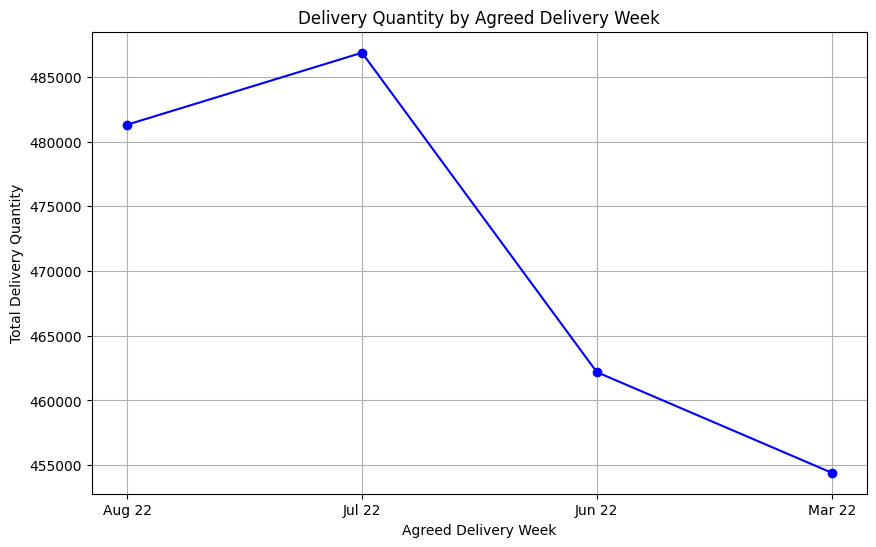

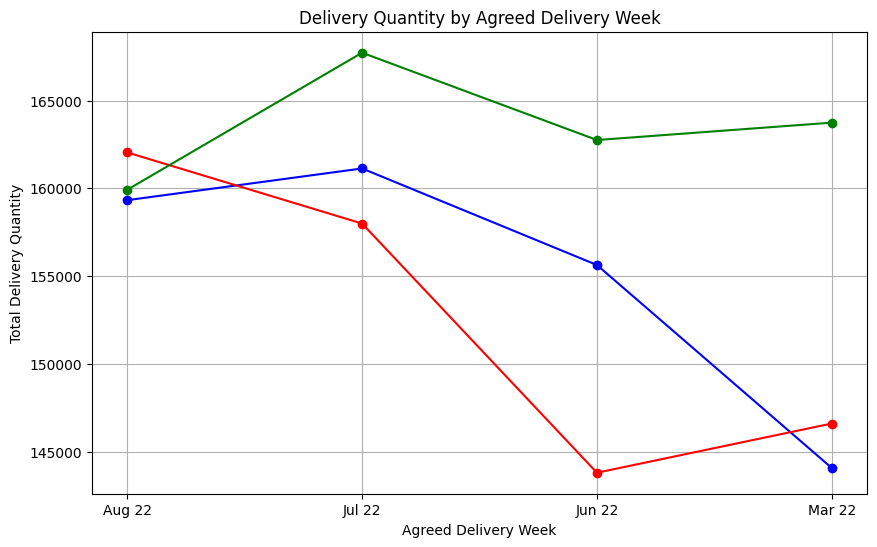

In [107]:
# Group by 'agreed_delivery_week_no' and calculate the sum of order quantities

def monthly_sum(df):
# Plot
    df_monthly_sum = df.groupby('agreed_delivery_mmm_yy')['order_qty'].sum().reset_index()[1:-1]
    plt.figure(figsize=(10, 6))
    plt.plot(df_monthly_sum['agreed_delivery_mmm_yy'], df_monthly_sum['order_qty'], color='blue', marker='o', linestyle='-')
    # plt.plot(df_weekly_sum2['agreed_delivery_mmm_yy'], df_weekly_sum2['order_qty'], color='red', marker='o', linestyle='-')

    plt.title('Delivery Quantity by Agreed Delivery Week')
    plt.xlabel('Agreed Delivery Week')
    plt.ylabel('Total Delivery Quantity')
    plt.grid(True)
    plt.show()
def monthly_sum_per_item(df1,df2,df3):   
    # Group by 'agreed_delivery_week_no' and calculate the sum of order quantities
    df1 = df1.groupby('agreed_delivery_mmm_yy')['order_qty'].sum().reset_index()[1:-1]
    df2 = df2.groupby('agreed_delivery_mmm_yy')['order_qty'].sum().reset_index()[1:-1]
    df3 = df3.groupby('agreed_delivery_mmm_yy')['order_qty'].sum().reset_index()[1:-1]

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(df1['agreed_delivery_mmm_yy'], df1['order_qty'], color='blue', marker='o', linestyle='-')
    plt.plot(df2['agreed_delivery_mmm_yy'], df2['order_qty'], color='red', marker='o', linestyle='-')
    plt.plot(df3['agreed_delivery_mmm_yy'], df3['order_qty'], color='green', marker='o', linestyle='-')

    plt.title('Delivery Quantity by Agreed Delivery Week')
    plt.xlabel('Agreed Delivery Week')
    plt.ylabel('Total Delivery Quantity')
    plt.grid(True)
    plt.show()

monthly_sum(df)
monthly_sum_per_item(df1,df2,df3) 


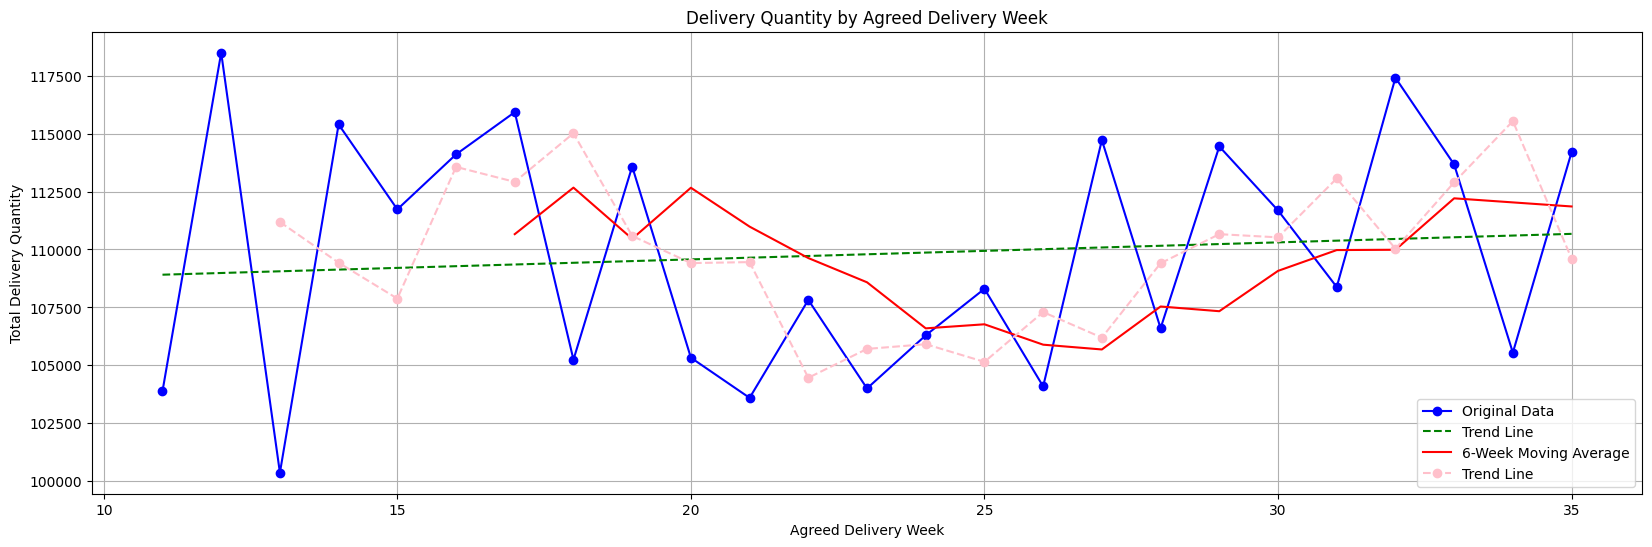

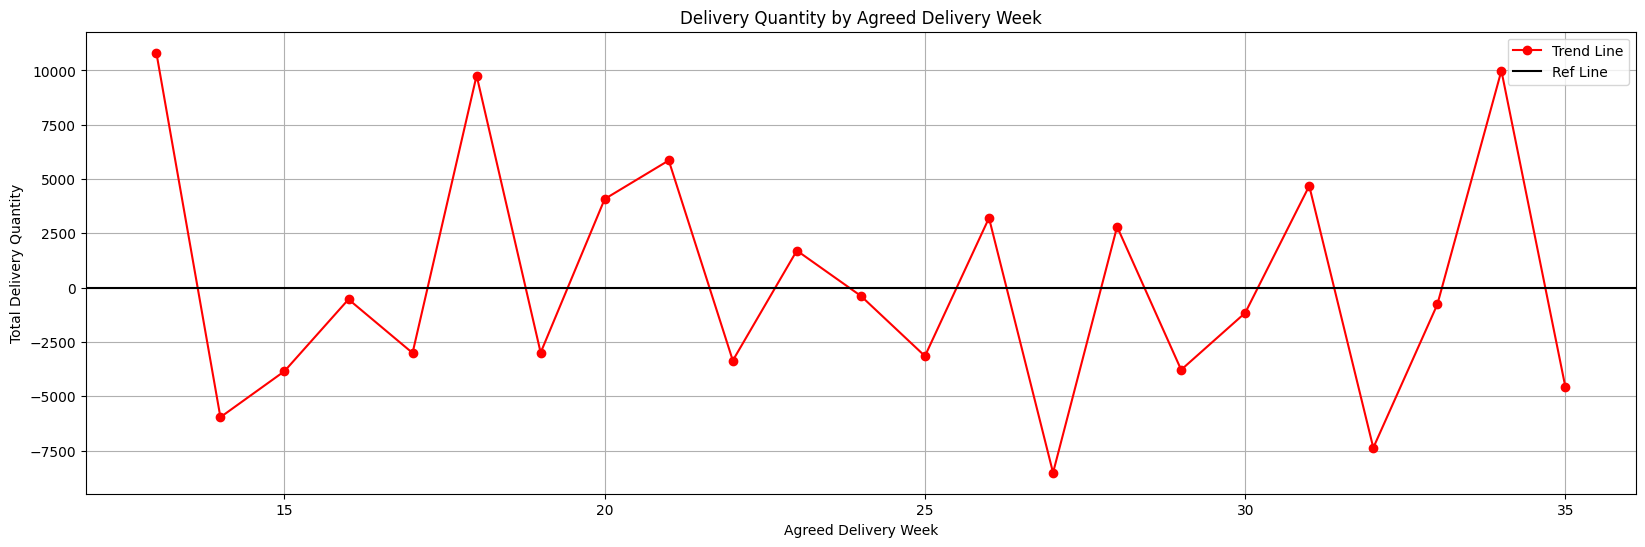

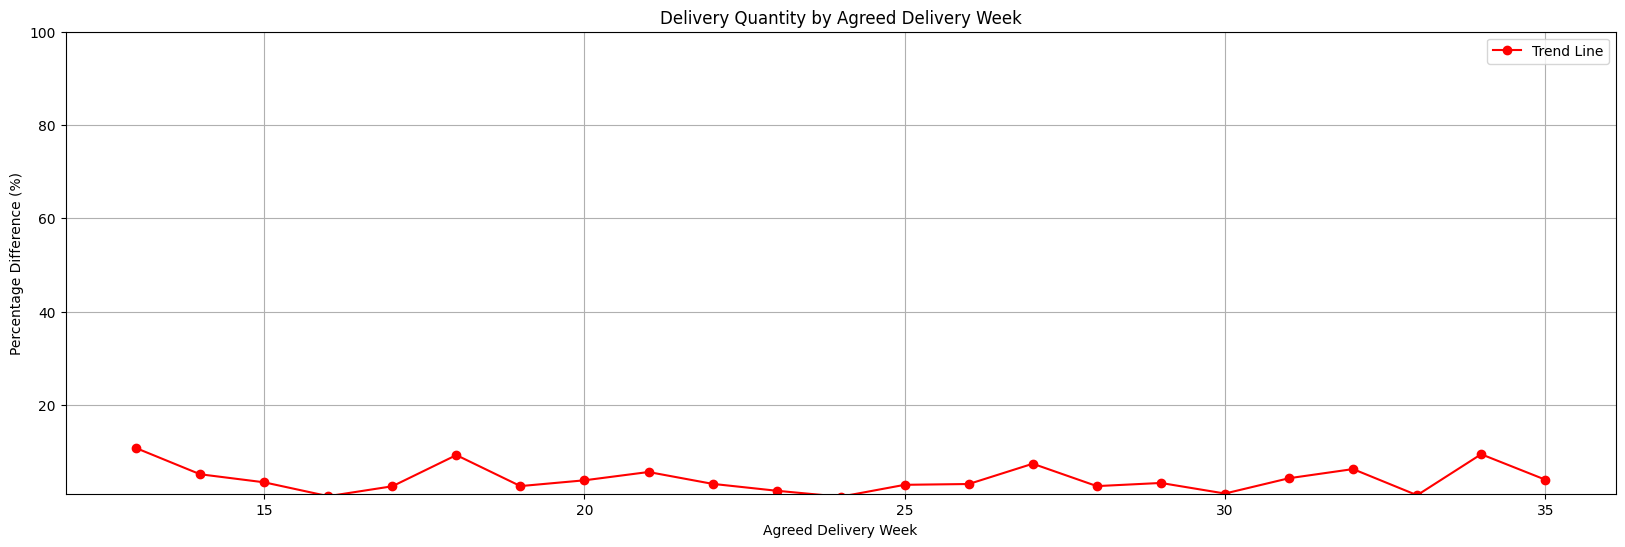

In [108]:
def weekly_sum(df):
    # Group by 'agreed_delivery_week_no' and calculate the sum of order quantities
    df = df.groupby('agreed_delivery_week_no')['order_qty'].sum().reset_index()[1:-1]
    # Calculate moving average
    df['moving_avg'] = df['order_qty'].rolling(window=6).mean().shift(1)
    df['moving_avg2'] = df['order_qty'].rolling(window=2).mean().shift(1)
    df['week_num'] = df['agreed_delivery_week_no'].str.extract('(\d+)').astype(int)

    # Fit linear regression
    X = np.array(df['week_num']).reshape(-1, 1)
    y = np.array(df['order_qty']).reshape(-1, 1)
    reg = LinearRegression().fit(X, y)

    # Predict trend
    df['trend'] = reg.predict(X)
    df['predict'] = df['trend']-(df['trend']-df['moving_avg2'])
    # Plot
    plt.figure(figsize=(20, 6))

    # Original data
    plt.plot(df['week_num'], df['order_qty'], color='blue', marker='o', linestyle='-', label='Original Data')
    plt.plot(df['week_num'], df['trend'], color='green', linestyle='--', label='Trend Line')
    plt.plot(df['week_num'], df['moving_avg'], color='red', linestyle='-', label='6-Week Moving Average')
    plt.plot(df['week_num'],df['predict'], color='pink', marker='o', linestyle='--', label='Trend Line')

    plt.title('Delivery Quantity by Agreed Delivery Week')
    plt.xlabel('Agreed Delivery Week')
    plt.ylabel('Total Delivery Quantity')
    plt.grid(True)
    plt.legend()  # Show legend
    plt.show()
    
    plt.figure(figsize=(20, 6))
    plt.plot(df['week_num'],df['predict']-df['order_qty'], color='red', marker='o', linestyle='-', label='Trend Line')
    plt.axhline(y=0, color='black', linestyle='-', label='Ref Line')
    plt.title('Delivery Quantity by Agreed Delivery Week')
    plt.xlabel('Agreed Delivery Week')
    plt.ylabel('Total Delivery Quantity')
    plt.grid(True)
    plt.legend()  # Show legend
    plt.show()

    plt.figure(figsize=(20, 6))
    plt.plot(df['week_num'], (abs(df['predict'] - df['order_qty']) / df['order_qty']) * 100, color='red', marker='o', linestyle='-', label='Trend Line')

    plt.title('Delivery Quantity by Agreed Delivery Week')
    plt.xlabel('Agreed Delivery Week')
    plt.ylabel('Percentage Difference (%)')  # Updated ylabel
    plt.grid(True)
    plt.legend()  # Show legend
    plt.ylim(1, 100)  # Set y-axis limits
    plt.show()

weekly_sum(df)

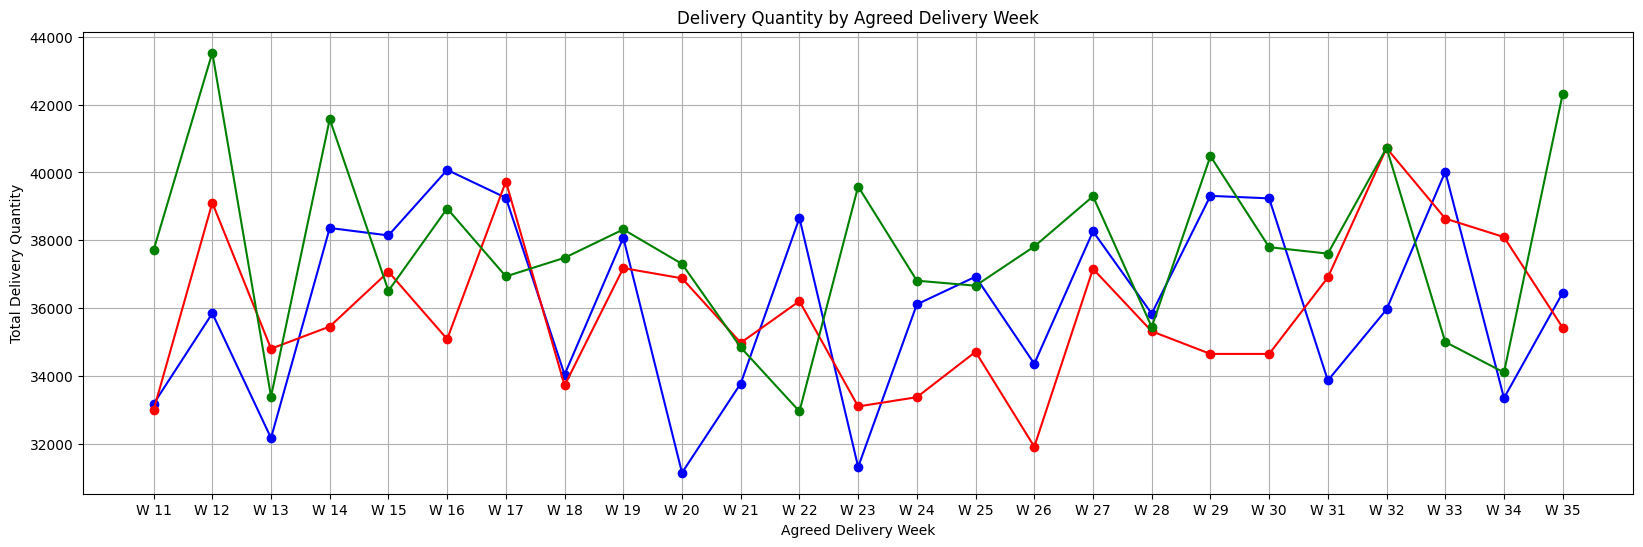

In [109]:
def weekly_sum_per_item(df1,df2,df3):
    # Group by 'agreed_delivery_week_no' and calculate the sum of order quantities
    df1 = df1.groupby('agreed_delivery_week_no')['order_qty'].sum().reset_index()[1:-1]
    df2 = df2.groupby('agreed_delivery_week_no')['order_qty'].sum().reset_index()[1:-1]
    df3 = df3.groupby('agreed_delivery_week_no')['order_qty'].sum().reset_index()[1:-1]

    # Plot
    plt.figure(figsize=(20, 6))
    plt.plot(df1['agreed_delivery_week_no'], df1['order_qty'], color='blue', marker='o', linestyle='-')
    plt.plot(df2['agreed_delivery_week_no'], df2['order_qty'], color='red', marker='o', linestyle='-')
    plt.plot(df3['agreed_delivery_week_no'], df3['order_qty'], color='green', marker='o', linestyle='-')

    plt.title('Delivery Quantity by Agreed Delivery Week')
    plt.xlabel('Agreed Delivery Week')
    plt.ylabel('Total Delivery Quantity')
    plt.grid(True)
    plt.show()
weekly_sum_per_item(df1,df2,df3)

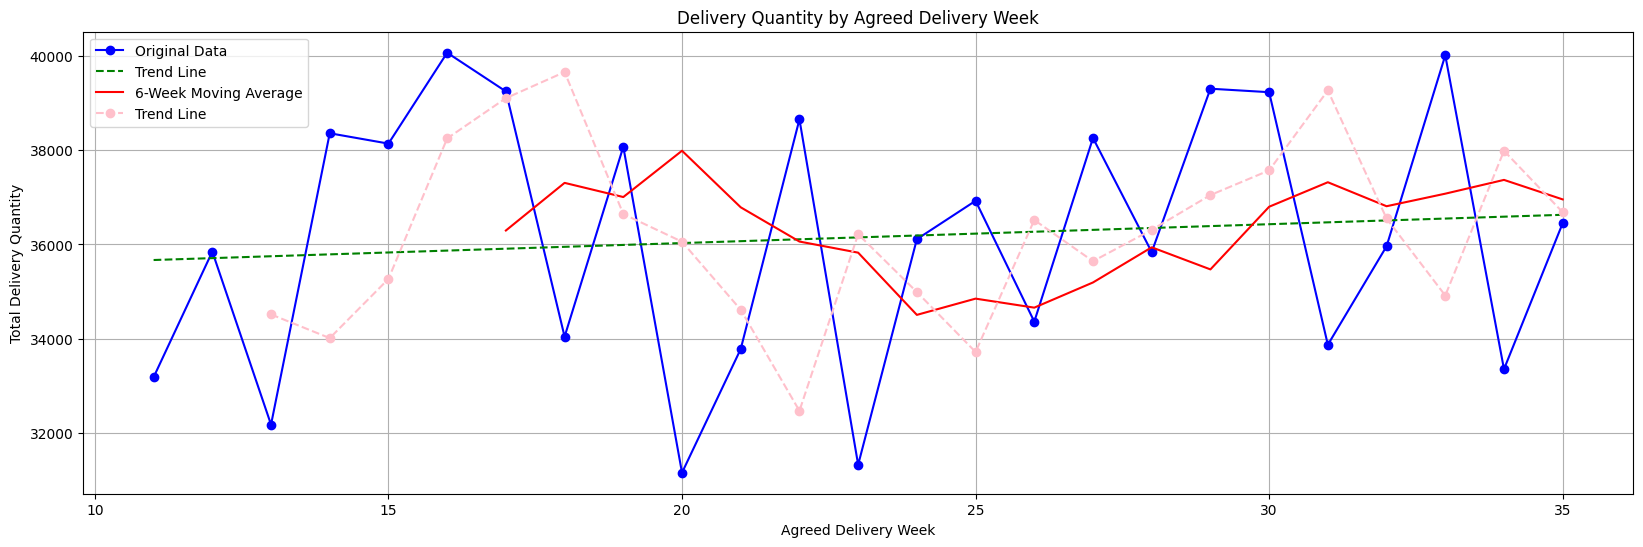

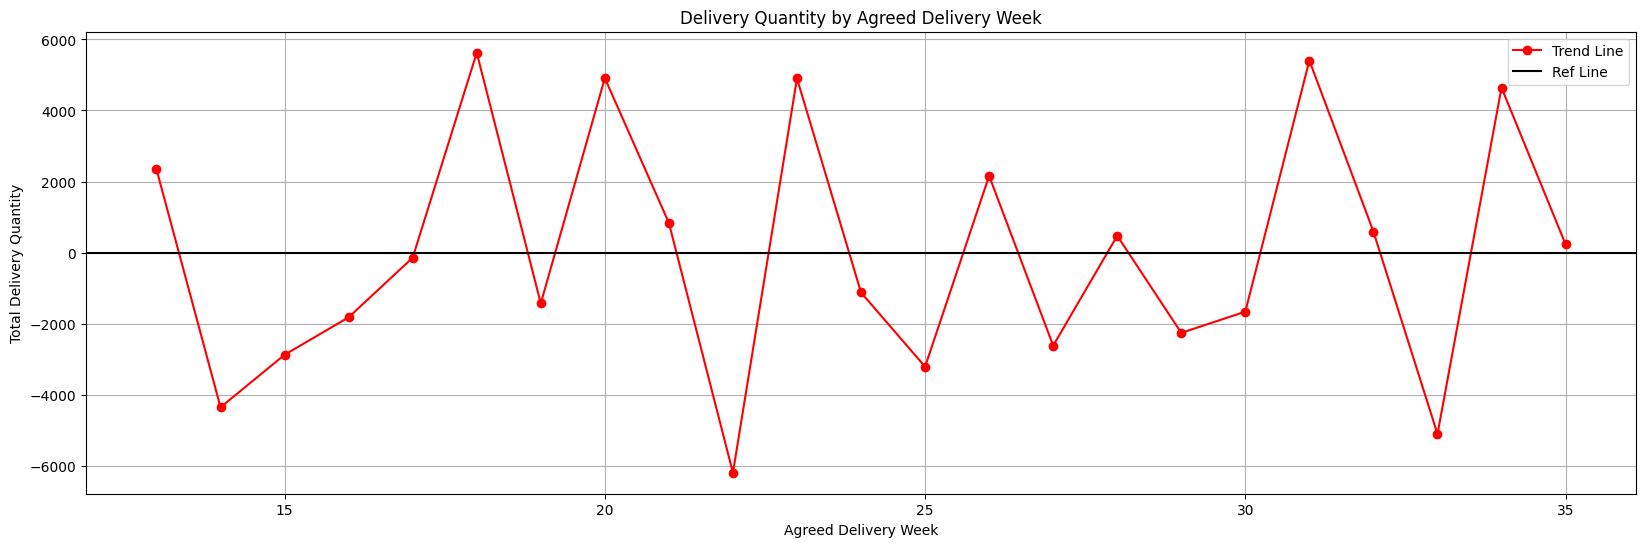

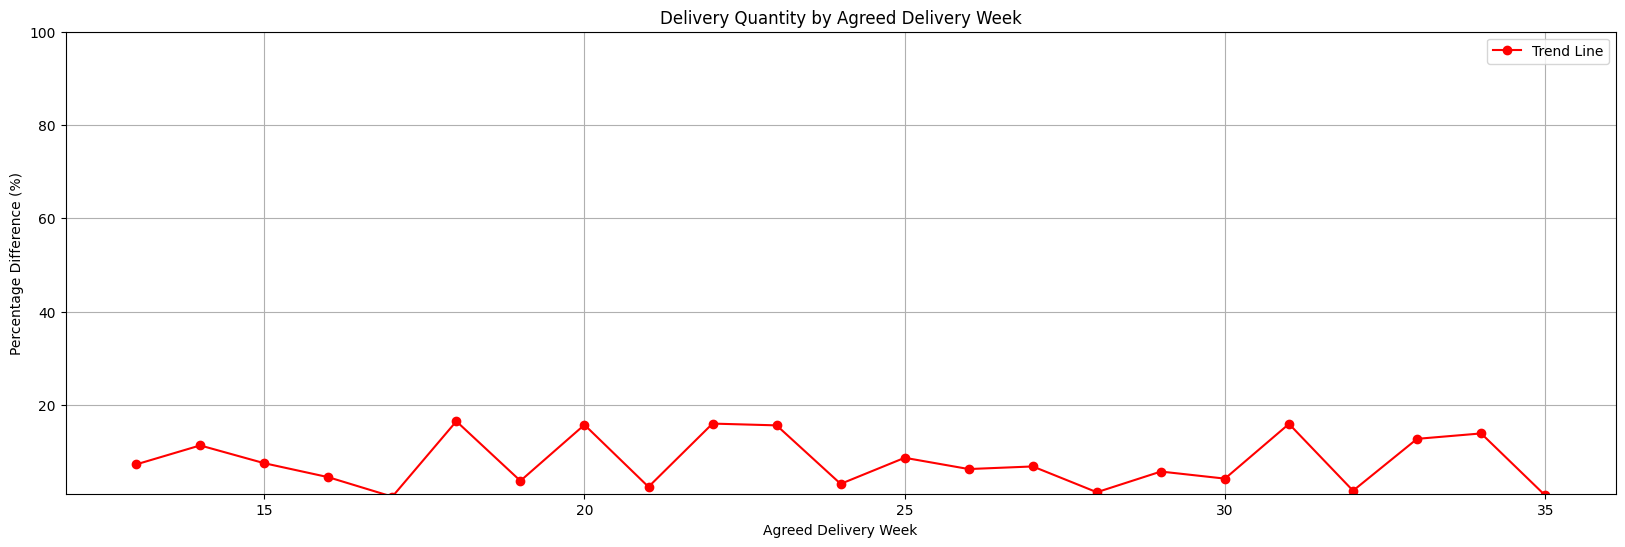

In [110]:
weekly_sum(df1)

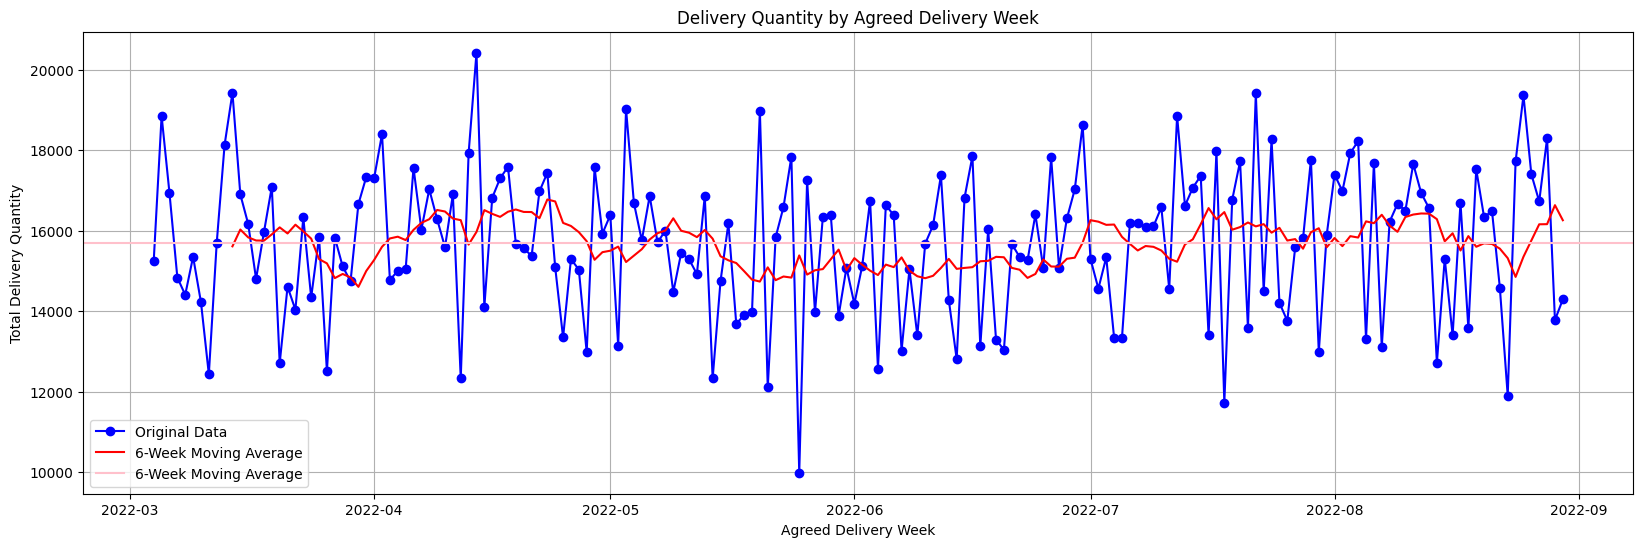

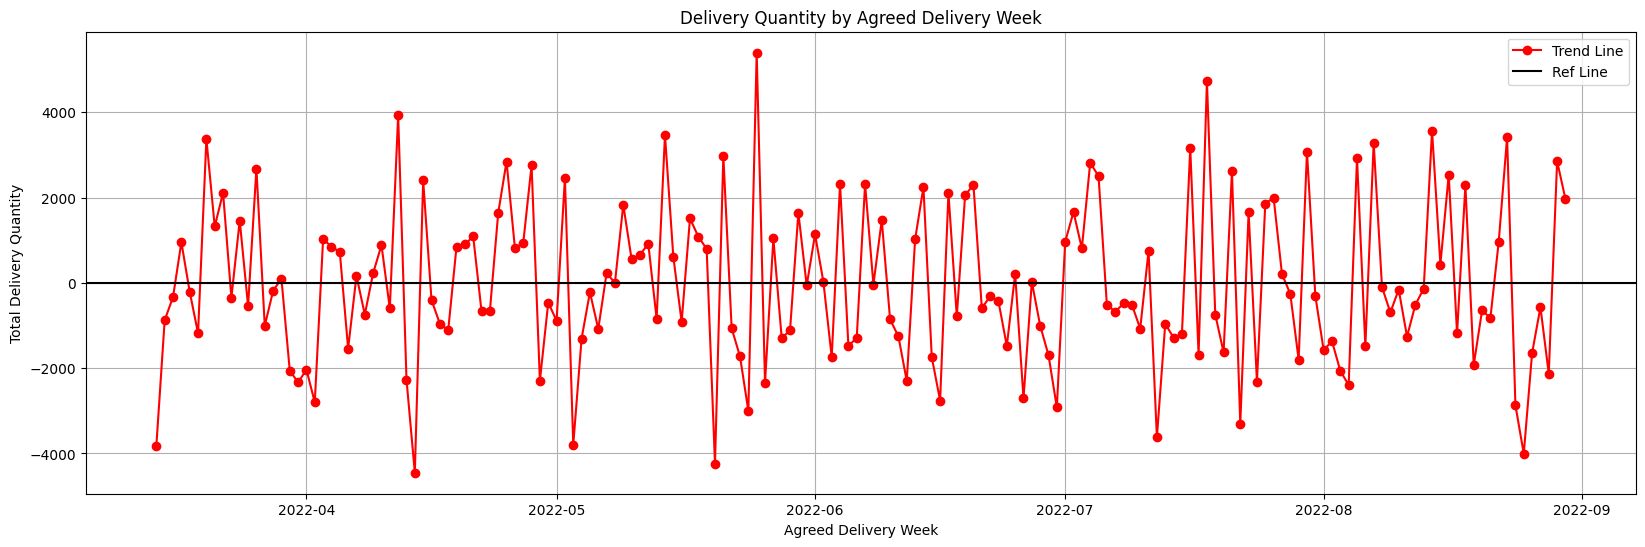

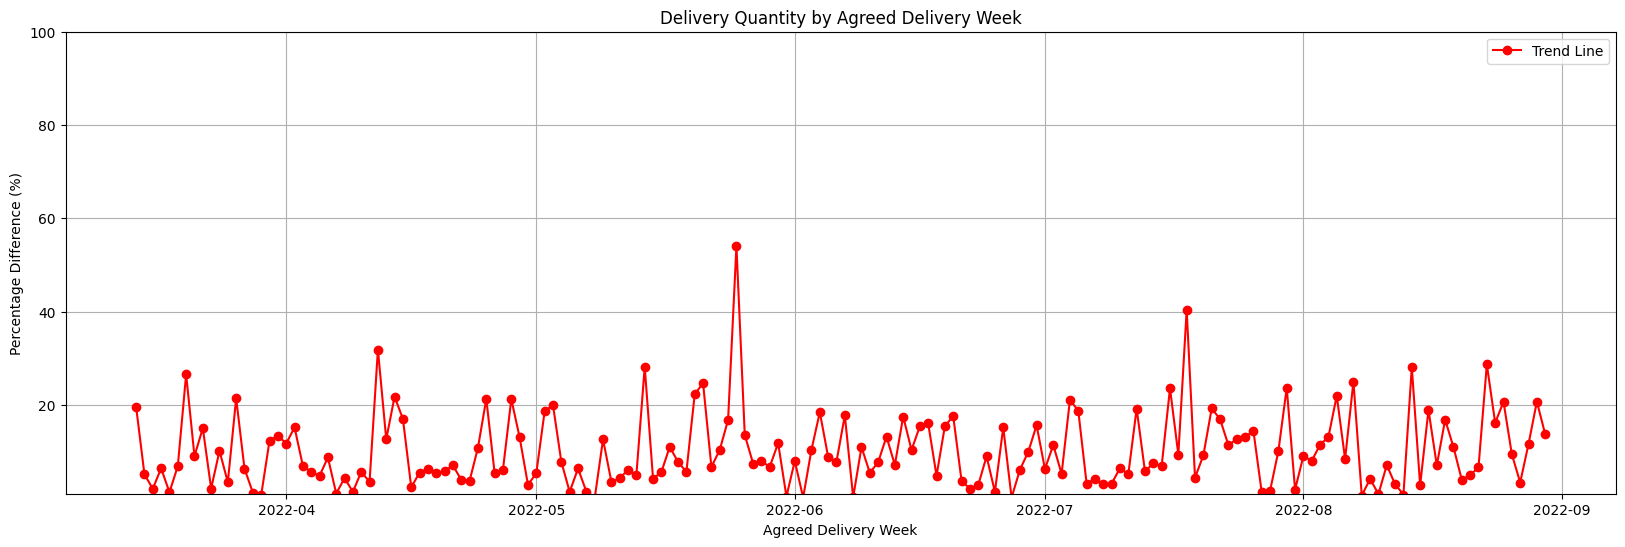

In [111]:
def daily_sum(df):
    # Group by 'agreed_delivery_week_no' and calculate the sum of order quantities
    df = df.groupby('agreed_delivery_date_formatted')['order_qty'].sum().reset_index()[2:-1]
    # Calculate moving average
    df['moving_avg'] = df['order_qty'].rolling(window=10).mean().shift(1)
    df['moving_avg2'] = df['order_qty'].rolling(window=4).mean().shift(1)
    mean = df['order_qty'].mean()
    # df['Navive'] = 2*mean-df['moving_avg2']
    
    # Original data
    plt.figure(figsize=(20, 6))
    plt.plot(df['agreed_delivery_date_formatted'], df['order_qty'], color='blue', marker='o', linestyle='-', label='Original Data')
    plt.plot(df['agreed_delivery_date_formatted'], df['moving_avg'], color='red', linestyle='-', label='6-Week Moving Average')
    # plt.plot(df['agreed_delivery_date_formatted'], df['Navive'], color='pink', linestyle='-', label='6-Week Moving Average')
    plt.axhline(y=mean , color='pink', linestyle='-', label='6-Week Moving Average')
    plt.title('Delivery Quantity by Agreed Delivery Week')
    plt.xlabel('Agreed Delivery Week')
    plt.ylabel('Total Delivery Quantity')
    plt.grid(True)
    plt.legend()  # Show legend
    plt.show()
    
    plt.figure(figsize=(20, 6))
    plt.plot(df['agreed_delivery_date_formatted'],df['moving_avg']-df['order_qty'], color='red', marker='o', linestyle='-', label='Trend Line')
    # plt.plot(df['agreed_delivery_date_formatted'],df['Navive']-df['order_qty'], color='pink', marker='o', linestyle='-', label='Trend Line')
    plt.axhline(y=0, color='black', linestyle='-', label='Ref Line')
    plt.title('Delivery Quantity by Agreed Delivery Week')
    plt.xlabel('Agreed Delivery Week')
    plt.ylabel('Total Delivery Quantity')
    plt.grid(True)
    plt.legend()  # Show legend
    plt.show()
    plt.figure(figsize=(20, 6))
    plt.plot(df['agreed_delivery_date_formatted'], (abs(df['moving_avg'] - df['order_qty']) / df['order_qty']) * 100, color='red', marker='o', linestyle='-', label='Trend Line')
    # plt.plot(df['agreed_delivery_date_formatted'], (abs(df['Navive'] - df['order_qty']) / df['order_qty']) * 100, color='pink', marker='o', linestyle='-', label='Trend Line')
    plt.title('Delivery Quantity by Agreed Delivery Week')
    plt.xlabel('Agreed Delivery Week')
    plt.ylabel('Percentage Difference (%)')  # Updated ylabel
    plt.grid(True)
    plt.legend()  # Show legend
    plt.ylim(1, 100)  # Set y-axis limits
    plt.show()

daily_sum(df)

In [112]:
def daily_sum_per_item(df1,df2,df3):
    # Group by 'agreed_delivery_week_no' and calculate the sum of order quantities
    df1 = df1.groupby('agreed_delivery_date_formatted')['order_qty'].sum().reset_index()[1:-1]
    df2 = df2.groupby('agreed_delivery_date_formatted')['order_qty'].sum().reset_index()[1:-1]
    df3 = df3.groupby('agreed_delivery_date_formatted')['order_qty'].sum().reset_index()[1:-1]

    # Plot
    plt.figure(figsize=(20, 6))
    plt.plot(df1['agreed_delivery_date_formatted'], df1['order_qty'], color='blue', linestyle='-', markersize=1)
    plt.plot(df2['agreed_delivery_date_formatted'], df2['order_qty'], color='red', linestyle='-', markersize=1)
    plt.plot(df3['agreed_delivery_date_formatted'], df3['order_qty'], color='green', linestyle='-', markersize=1)



    plt.title('Delivery Quantity by Agreed Delivery Week')
    plt.xlabel('Agreed Delivery Week')
    plt.ylabel('Total Delivery Quantity')
    plt.grid(True)
    plt.show()
    

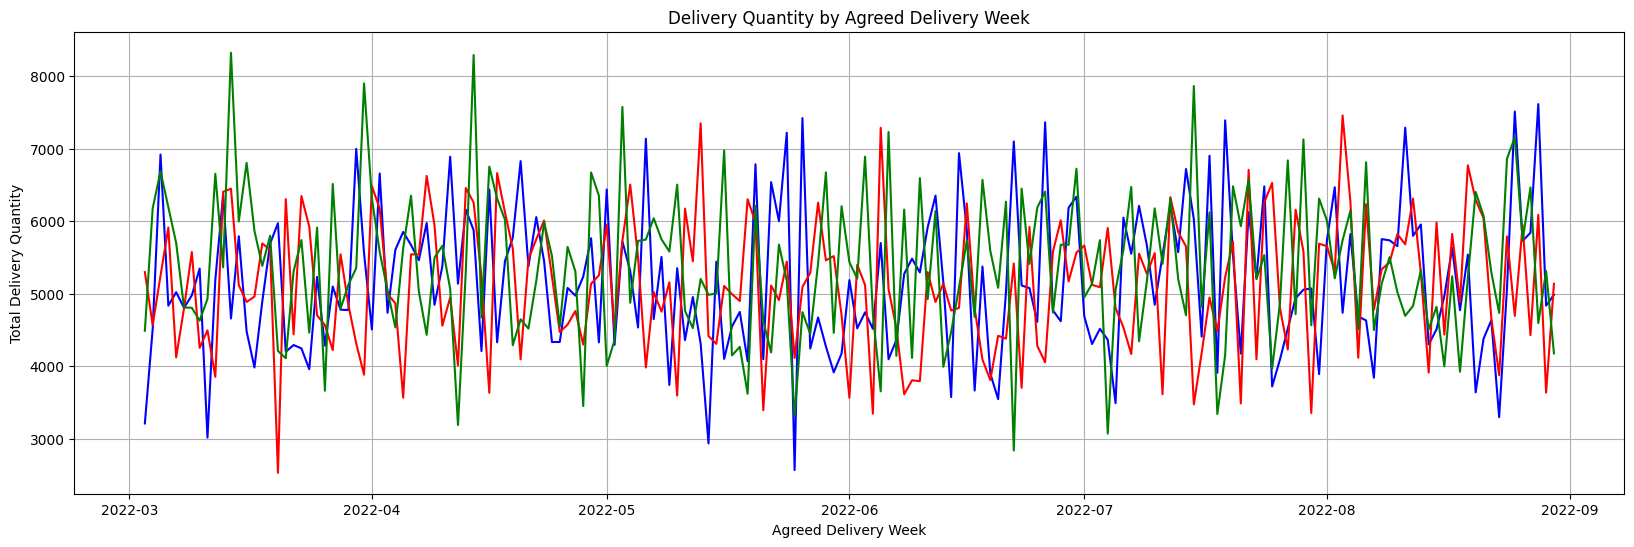

In [113]:
daily_sum_per_item(df1,df2,df3)

In [114]:
train_SC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57097 entries, 0 to 57096
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 57096 non-null  object 
 1   order_placement_date     57096 non-null  object 
 2   customer_id              57096 non-null  float64
 3   product_id               57096 non-null  float64
 4   order_qty                57096 non-null  float64
 5   agreed_delivery_date     57097 non-null  object 
 6   actual_delivery_date     57096 non-null  object 
 7   delivery_qty             57096 non-null  float64
 8   in_full                  57096 non-null  float64
 9   on_time                  57096 non-null  float64
 10  on_time_in_full          57096 non-null  float64
 11  customer_name            57096 non-null  object 
 12  city                     57096 non-null  object 
 13  product_name             57096 non-null  object 
 14  category              

In [115]:
dfx = train_SC[((train_SC['city'] == 'Ahmedabad') & train_SC['product_id'] == 25891201)|(train_SC['product_id'] == 25891202)|(train_SC['product_id'] == 25891203)] 
# df = train_SC[(train_SC['customer_id'] == 789201) & (train_SC['product_id'] == 25891103)] 

dfx1 = train_SC[(train_SC['city'] == 'Ahmedabad') &(train_SC['product_id'] == 25891201)] 
dfx2 = train_SC[(train_SC['city'] == 'Ahmedabad') &(train_SC['product_id'] == 25891202)] 
dfx3 = train_SC[(train_SC['city'] == 'Ahmedabad') &(train_SC['product_id'] == 25891203)] 


In [116]:
# Convert 'actual_delivery_date' to datetime format

dfx['agreed_delivery_date_formatted'] = pd.to_datetime(dfx['agreed_delivery_date'], format='%d-%b-%y')
dfx = dfx.sort_values(by='agreed_delivery_date_formatted')


dfx1['agreed_delivery_date_formatted'] = pd.to_datetime(dfx1['agreed_delivery_date'], format='%d-%b-%y')
dfx1 = dfx1.sort_values(by='agreed_delivery_date_formatted')
dfx2['agreed_delivery_date_formatted'] = pd.to_datetime(dfx2['agreed_delivery_date'], format='%d-%b-%y')
dfx2 = dfx2.sort_values(by='agreed_delivery_date_formatted')
dfx3['agreed_delivery_date_formatted'] = pd.to_datetime(dfx3['agreed_delivery_date'], format='%d-%b-%y')
dfx3 = dfx3.sort_values(by='agreed_delivery_date_formatted')

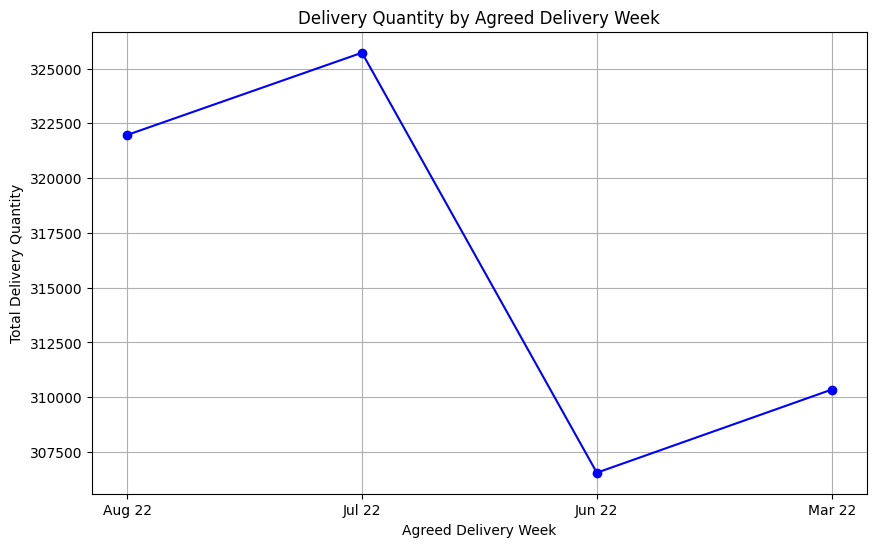

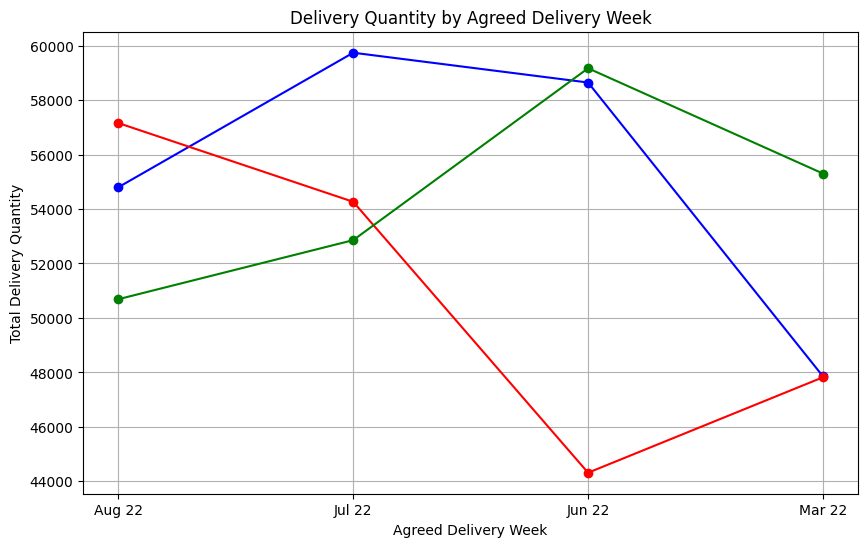

In [117]:
monthly_sum(dfx)
monthly_sum_per_item(dfx1,dfx2,dfx3)

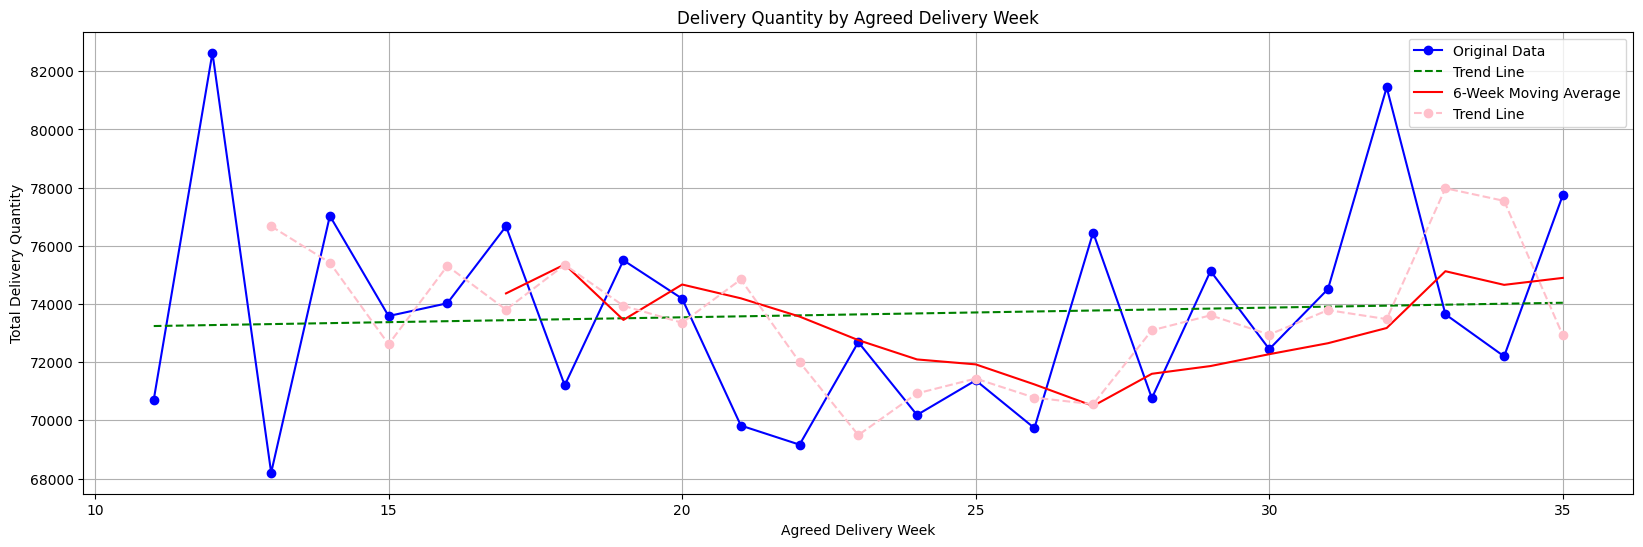

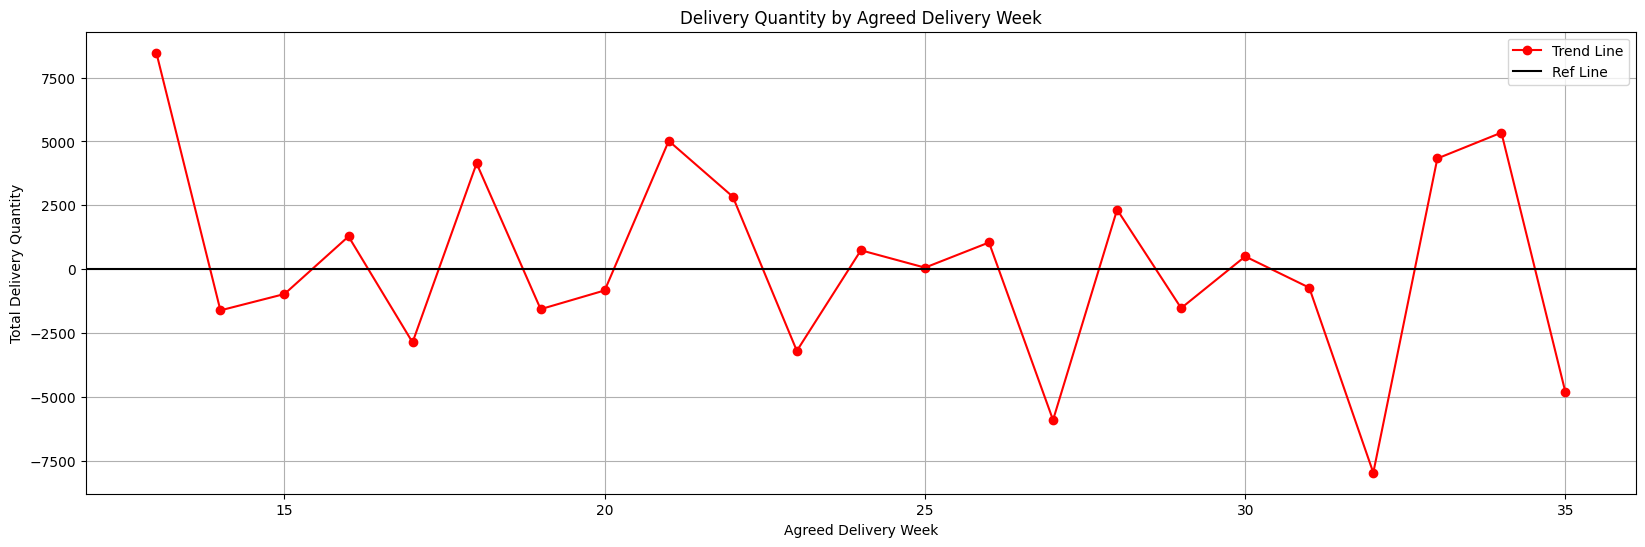

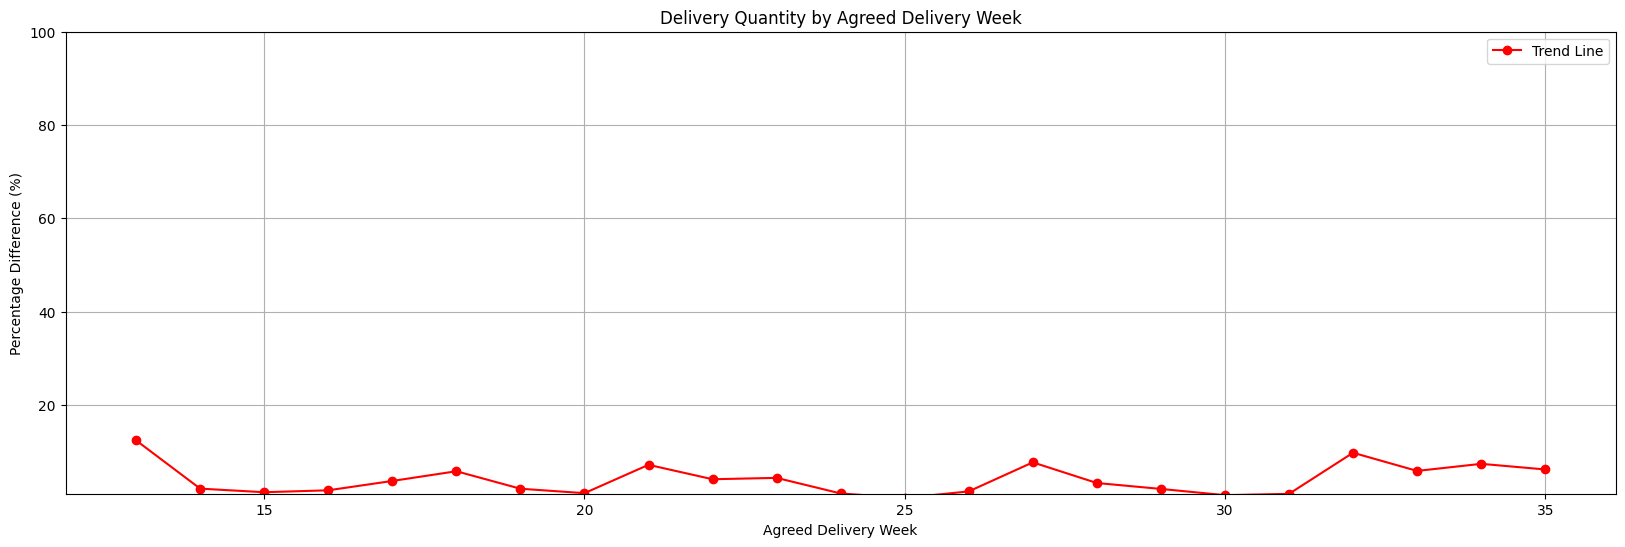

In [118]:
weekly_sum(dfx)


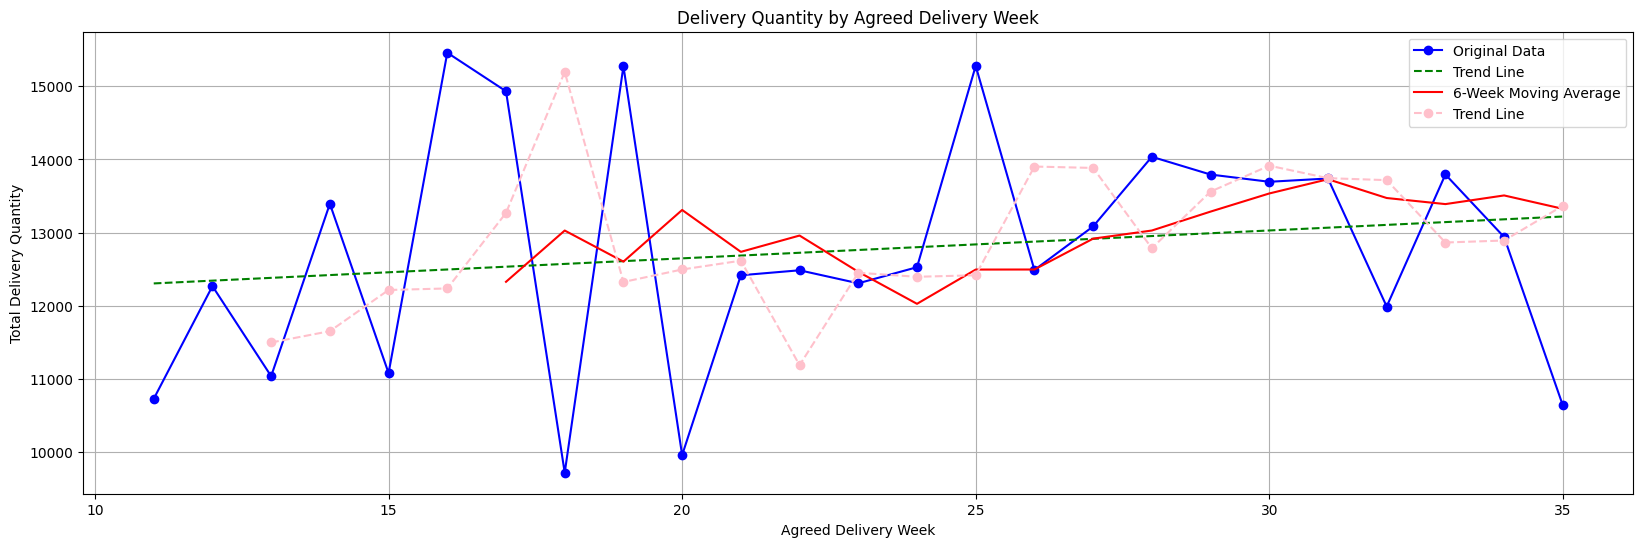

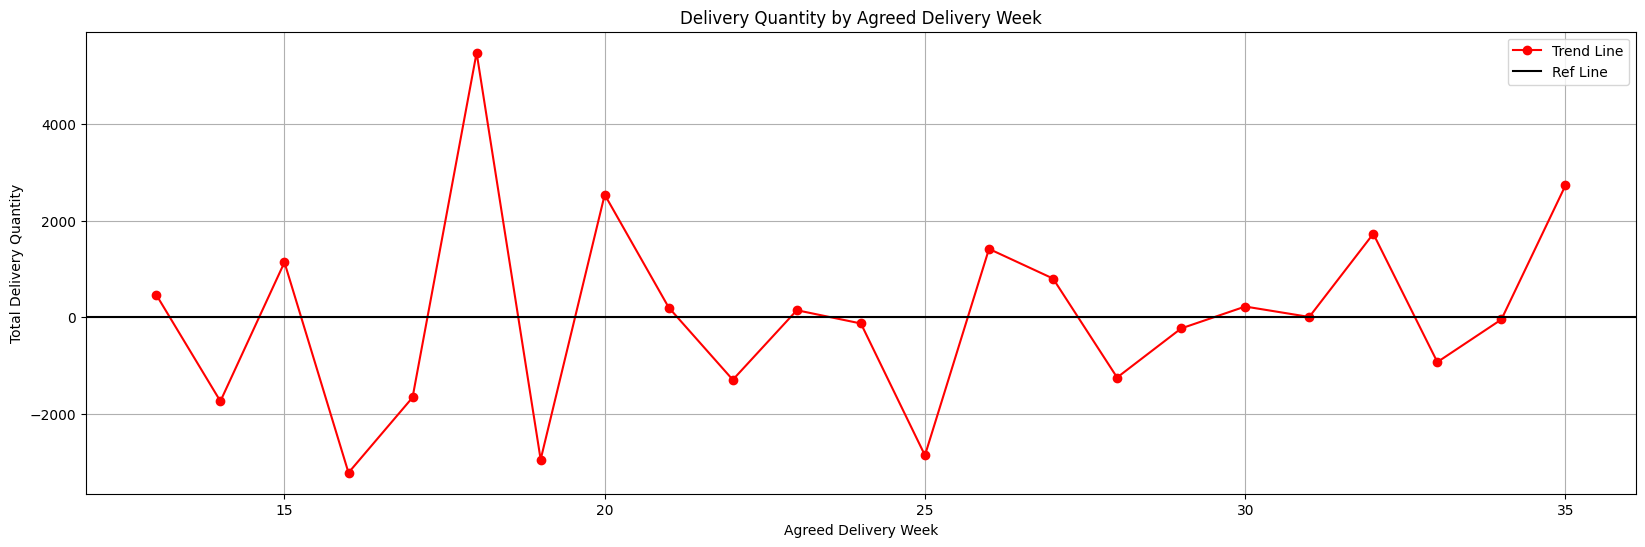

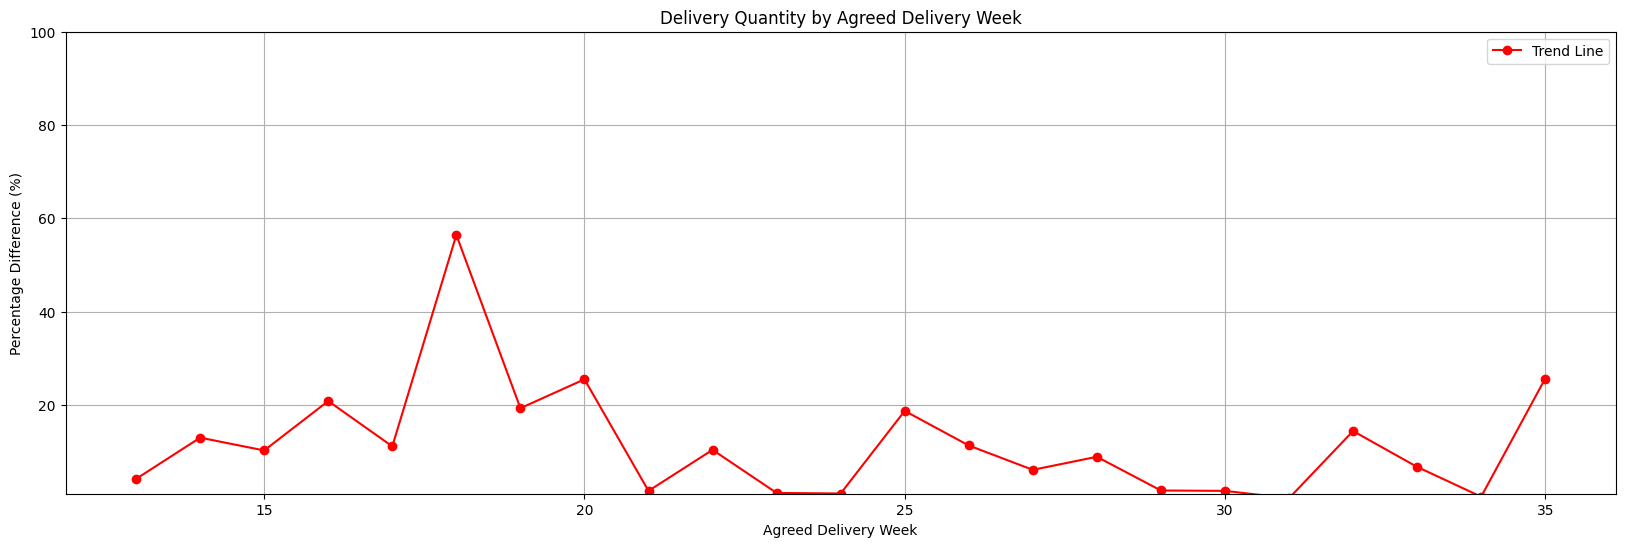

In [119]:
weekly_sum(dfx1)

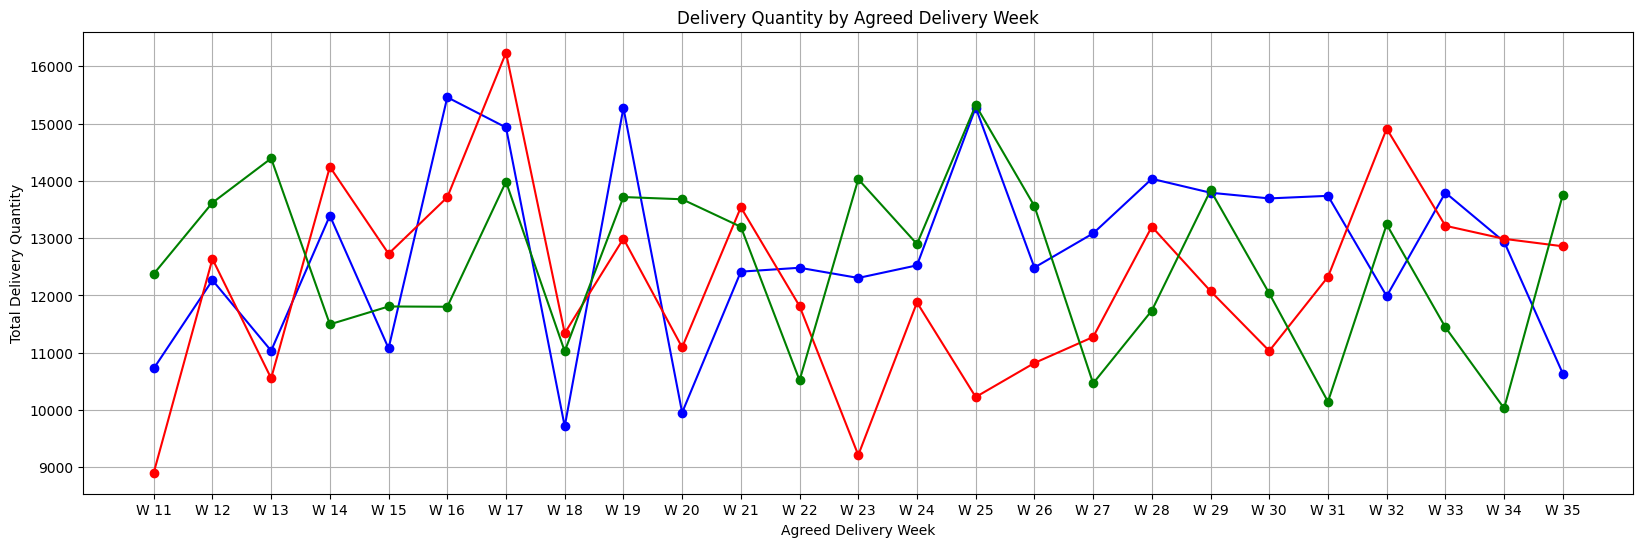

In [120]:
weekly_sum_per_item(dfx1,dfx2,dfx3)

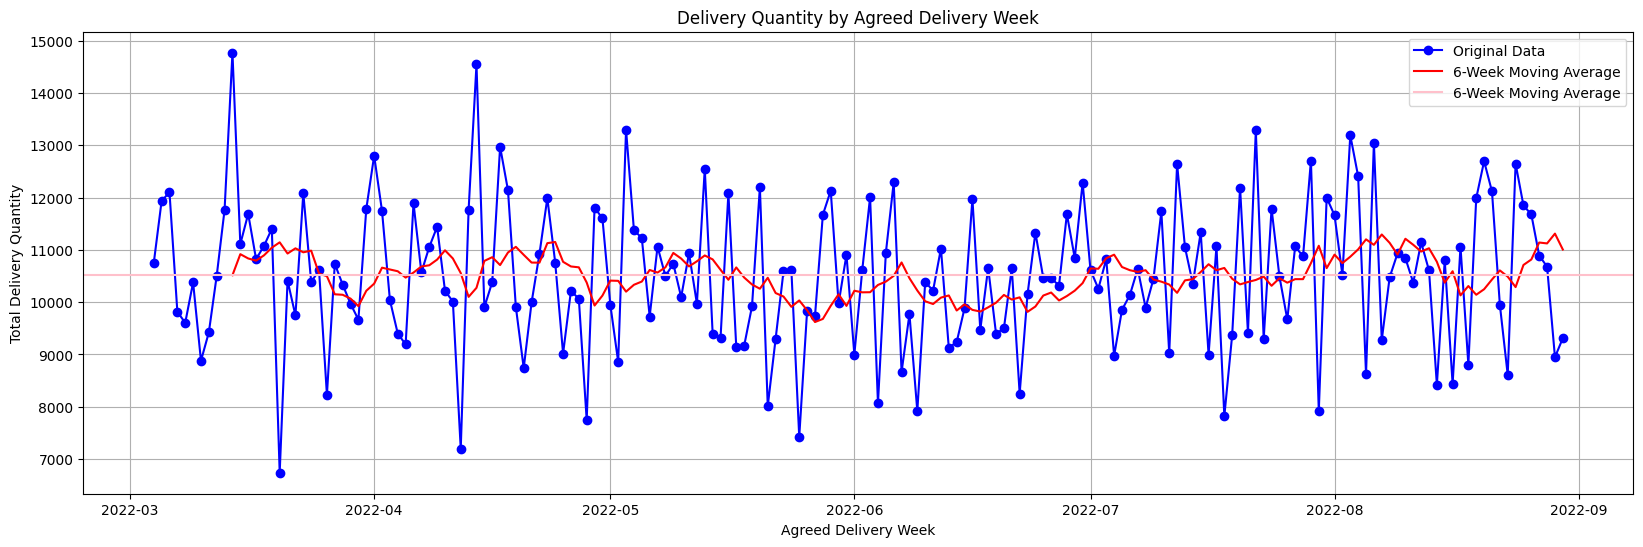

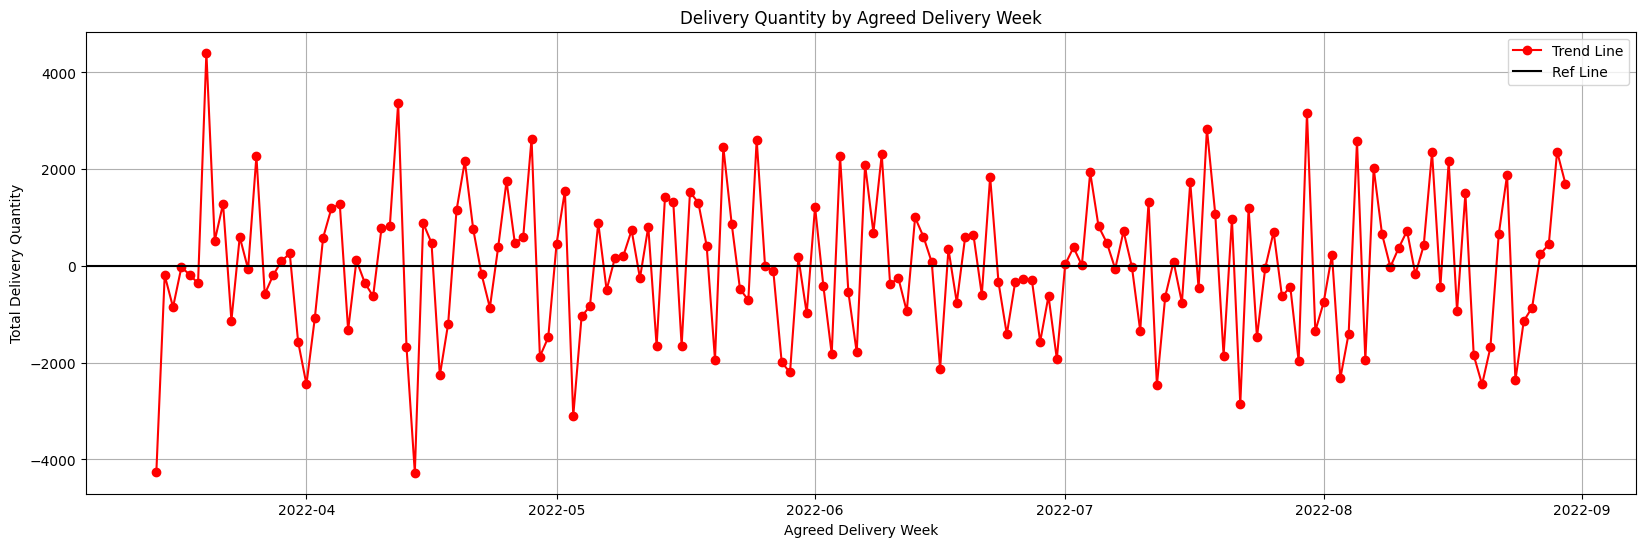

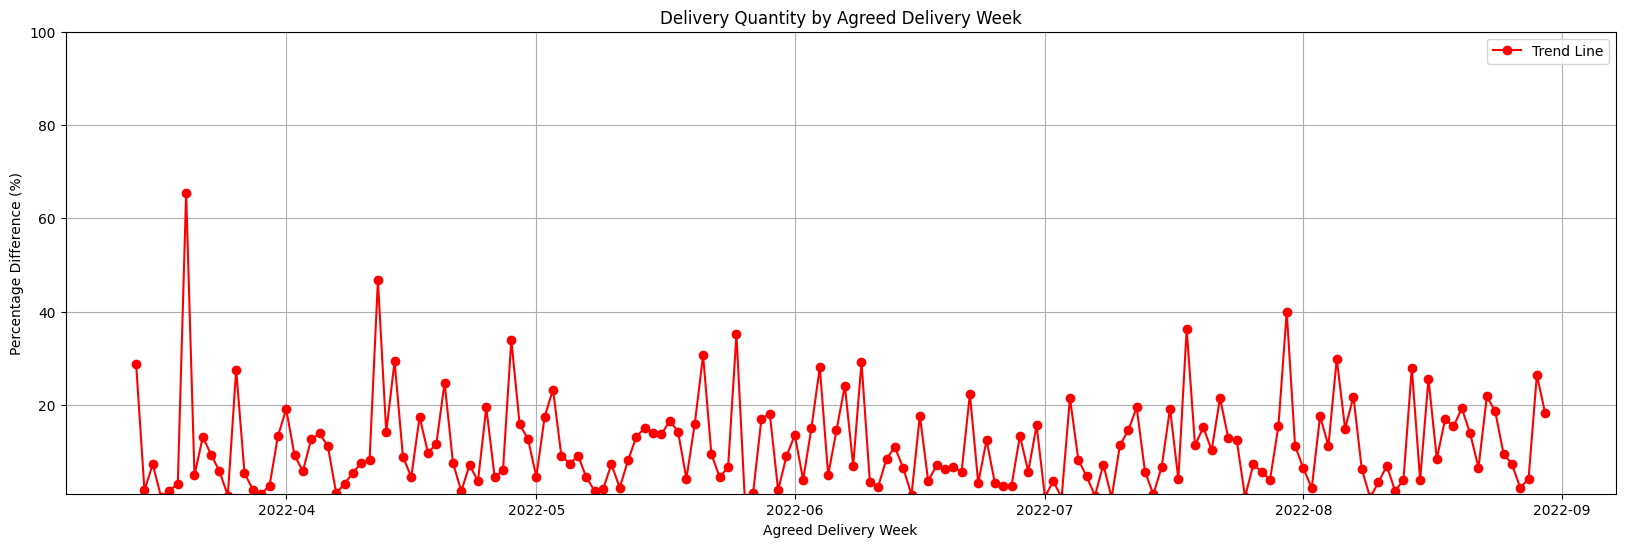

In [121]:
daily_sum(dfx)

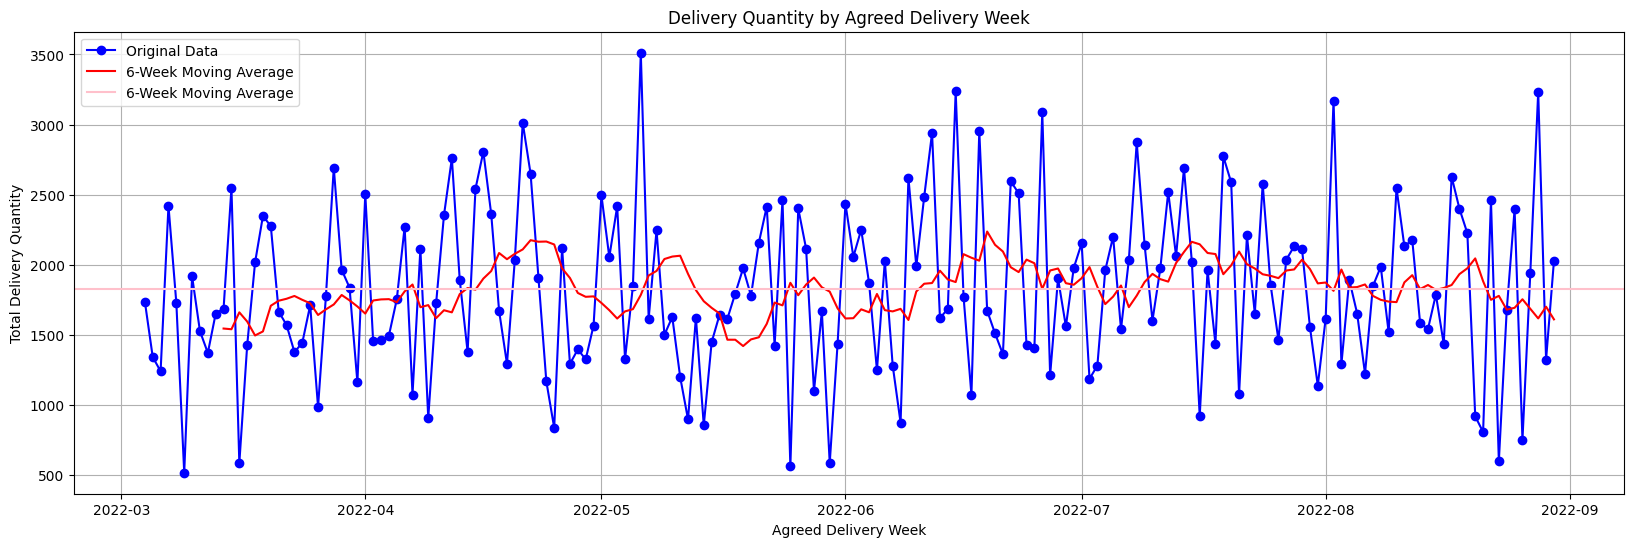

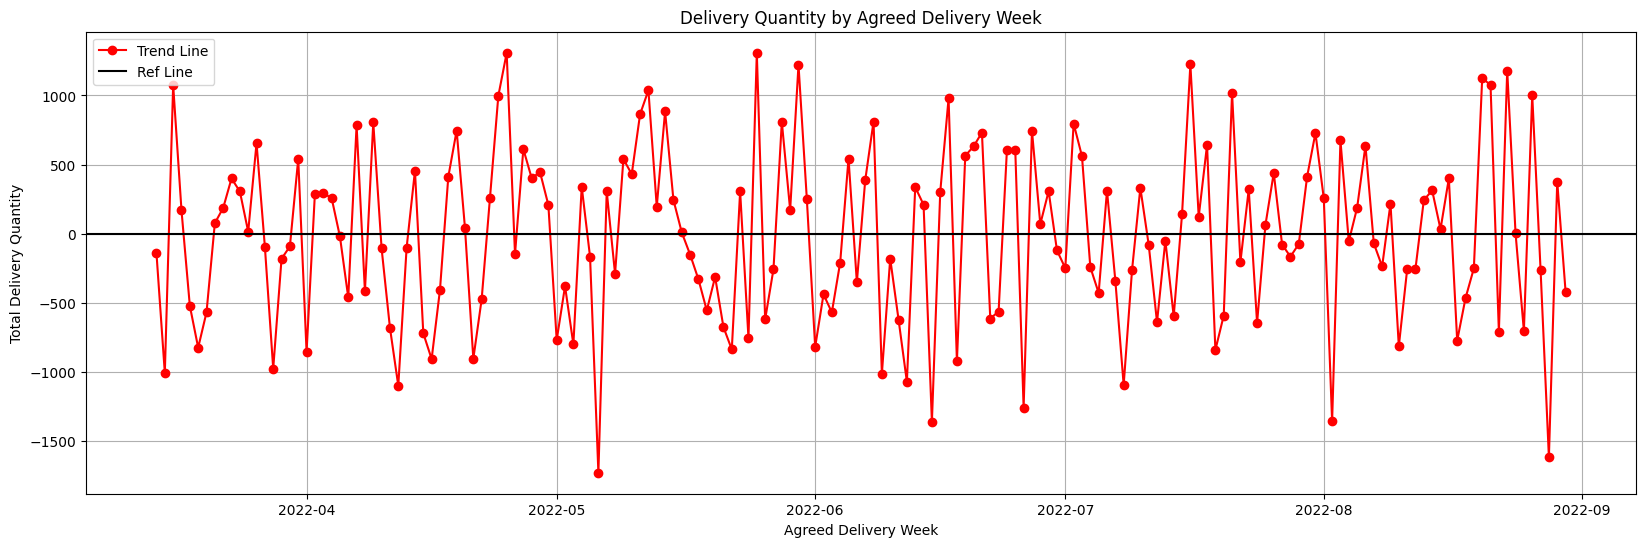

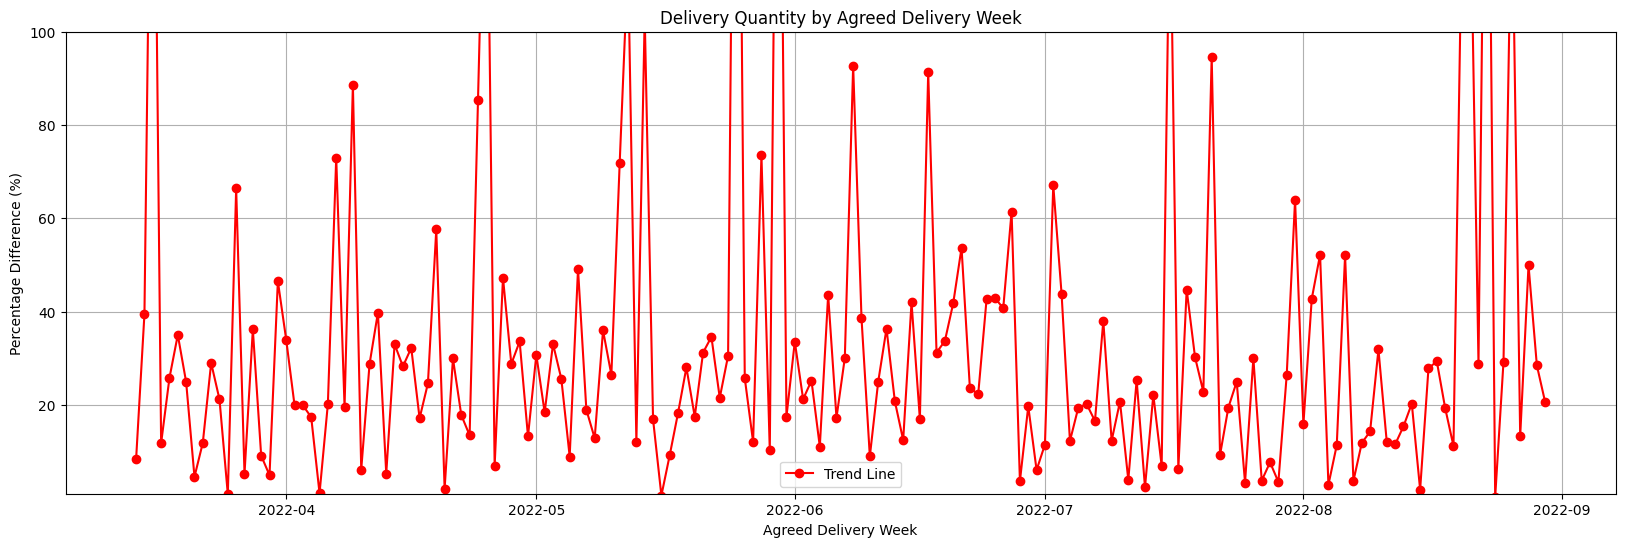

In [122]:
daily_sum(dfx1)

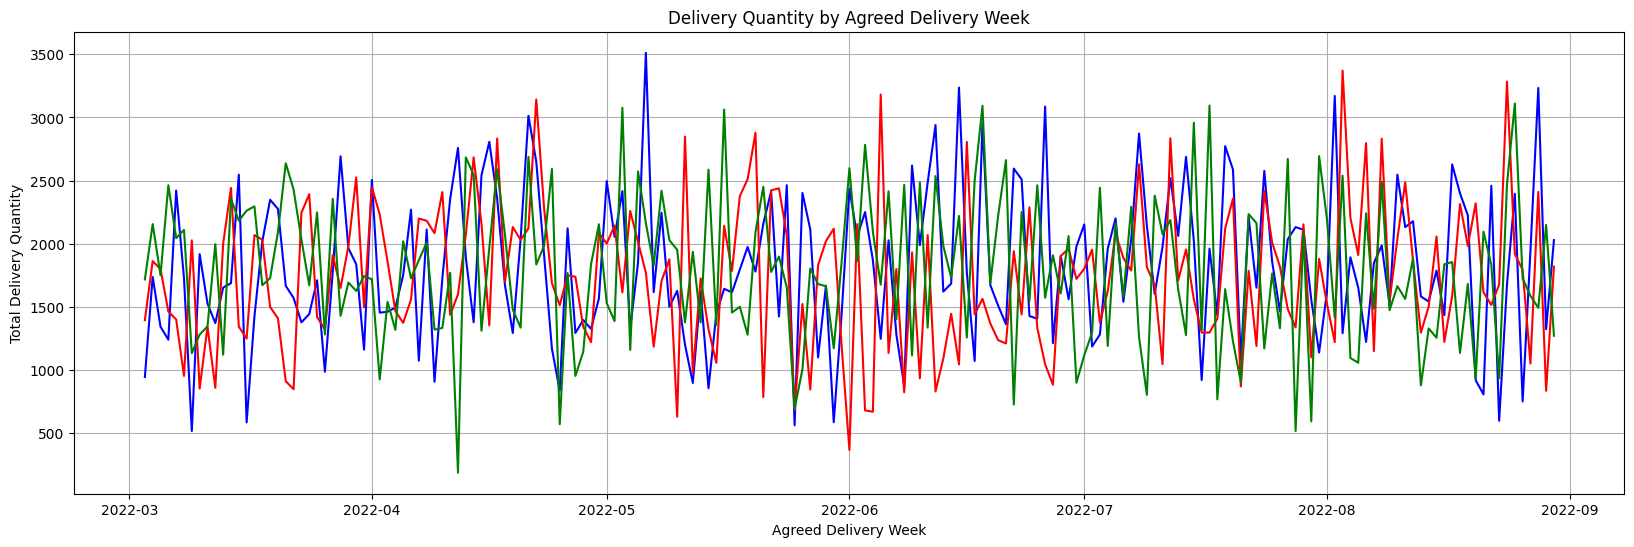

In [123]:
daily_sum_per_item(dfx1,dfx2,dfx3)

In [124]:
train_SC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57097 entries, 0 to 57096
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 57096 non-null  object 
 1   order_placement_date     57096 non-null  object 
 2   customer_id              57096 non-null  float64
 3   product_id               57096 non-null  float64
 4   order_qty                57096 non-null  float64
 5   agreed_delivery_date     57097 non-null  object 
 6   actual_delivery_date     57096 non-null  object 
 7   delivery_qty             57096 non-null  float64
 8   in_full                  57096 non-null  float64
 9   on_time                  57096 non-null  float64
 10  on_time_in_full          57096 non-null  float64
 11  customer_name            57096 non-null  object 
 12  city                     57096 non-null  object 
 13  product_name             57096 non-null  object 
 14  category              

In [125]:
dfz = train_SC[((train_SC['customer_id'] == 789201) & train_SC['product_id'] == 25891201)|(train_SC['product_id'] == 25891202)|(train_SC['product_id'] == 25891203)] 
# df = train_SC[(train_SC['customer_id'] == 789201) & (train_SC['product_id'] == 25891103)] 

dfz1 = train_SC[(train_SC['customer_id'] == 789201) &(train_SC['product_id'] == 25891201)] 
dfz2 = train_SC[(train_SC['customer_id'] == 789201) &(train_SC['product_id'] == 25891202)] 
dfz3 = train_SC[(train_SC['customer_id'] == 789201) &(train_SC['product_id'] == 25891203)]

In [126]:
# Convert 'actual_delivery_date' to datetime format

dfz['agreed_delivery_date_formatted'] = pd.to_datetime(dfz['agreed_delivery_date'], format='%d-%b-%y')
dfz = dfz.sort_values(by='agreed_delivery_date_formatted')


dfz1['agreed_delivery_date_formatted'] = pd.to_datetime(dfz1['agreed_delivery_date'], format='%d-%b-%y')
dfz1 = dfz1.sort_values(by='agreed_delivery_date_formatted')
dfz2['agreed_delivery_date_formatted'] = pd.to_datetime(dfz2['agreed_delivery_date'], format='%d-%b-%y')
dfz2 = dfz2.sort_values(by='agreed_delivery_date_formatted')
dfz3['agreed_delivery_date_formatted'] = pd.to_datetime(dfz3['agreed_delivery_date'], format='%d-%b-%y')
dfz3 = dfz3.sort_values(by='agreed_delivery_date_formatted')

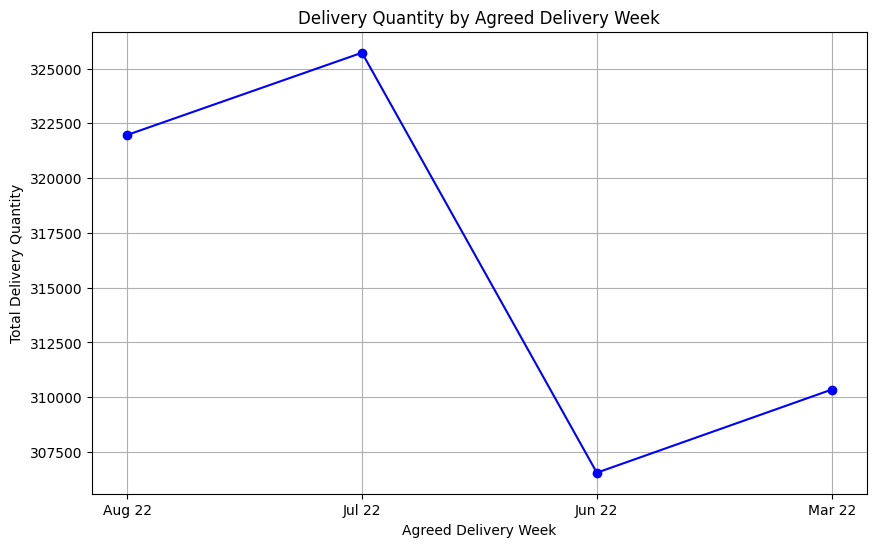

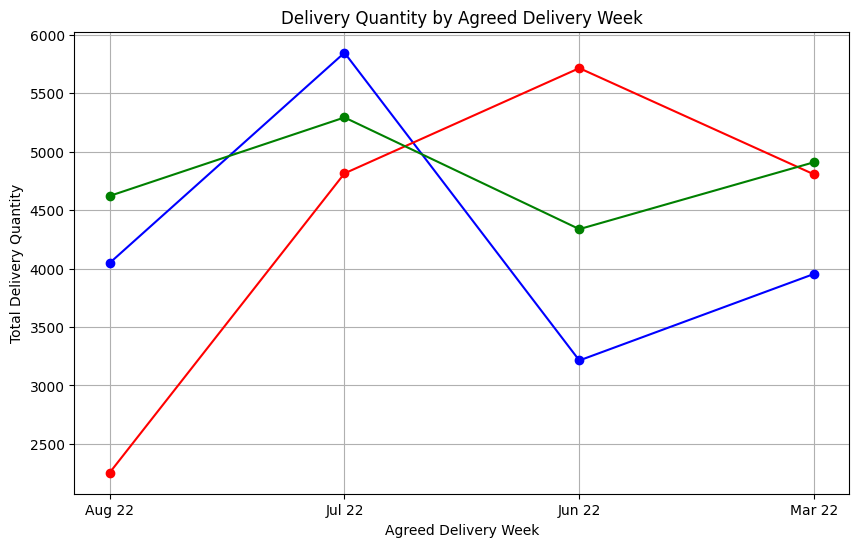

In [127]:
monthly_sum(dfz)
monthly_sum_per_item(dfz1,dfz2,dfz3)

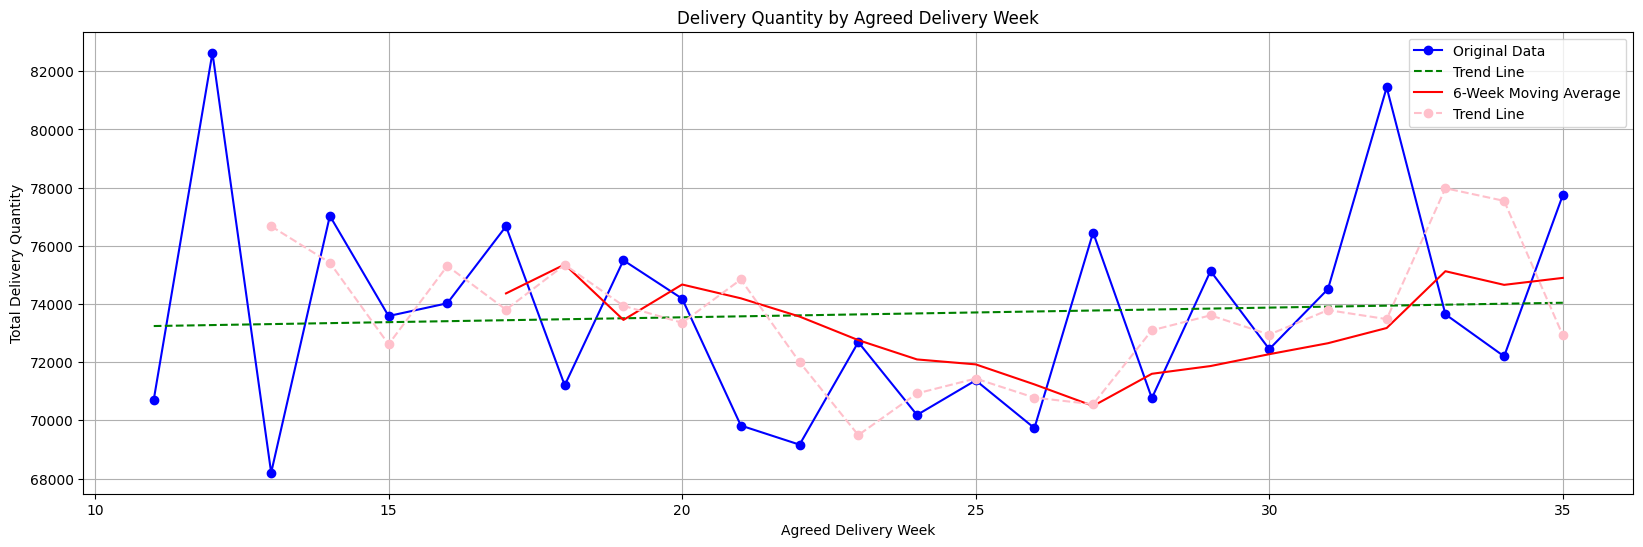

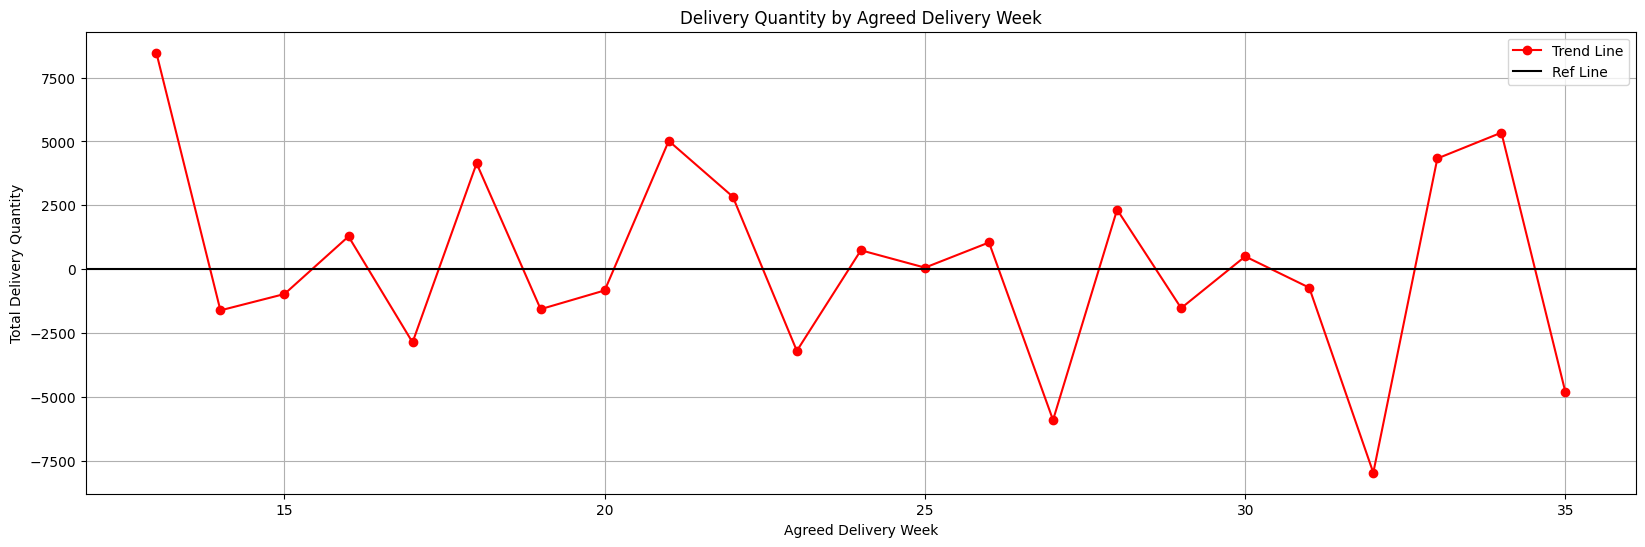

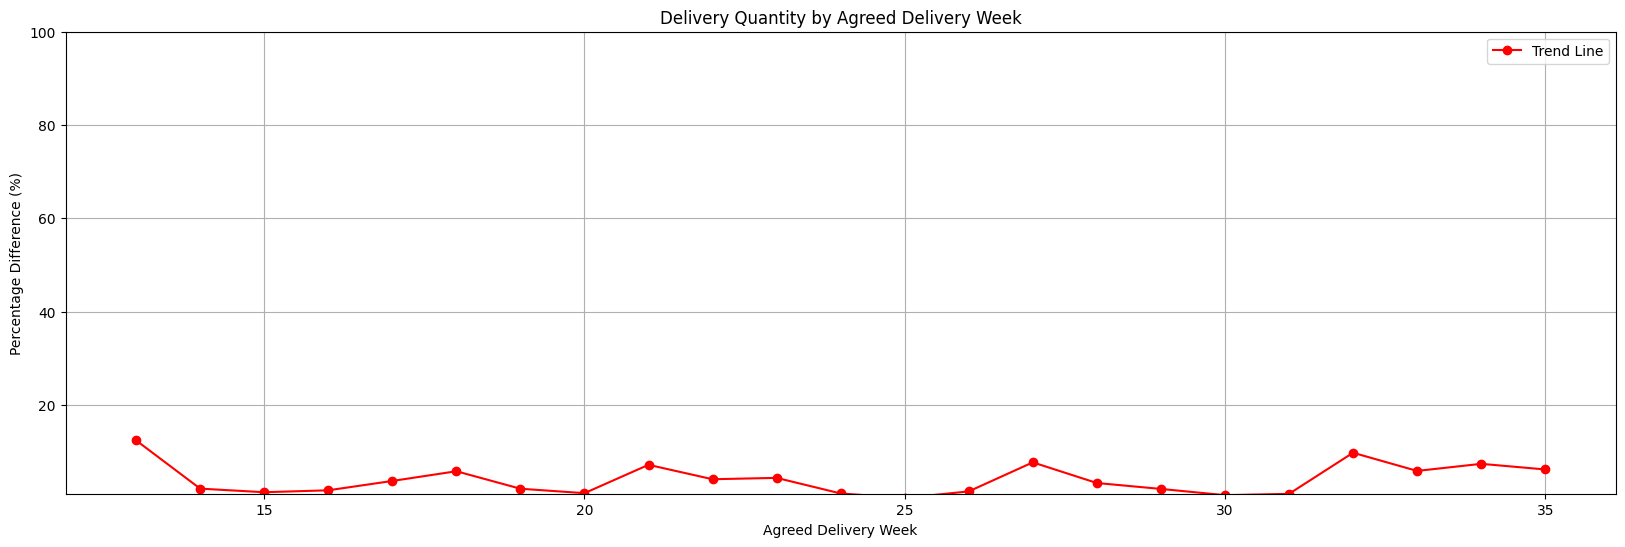

In [128]:
weekly_sum(dfz)

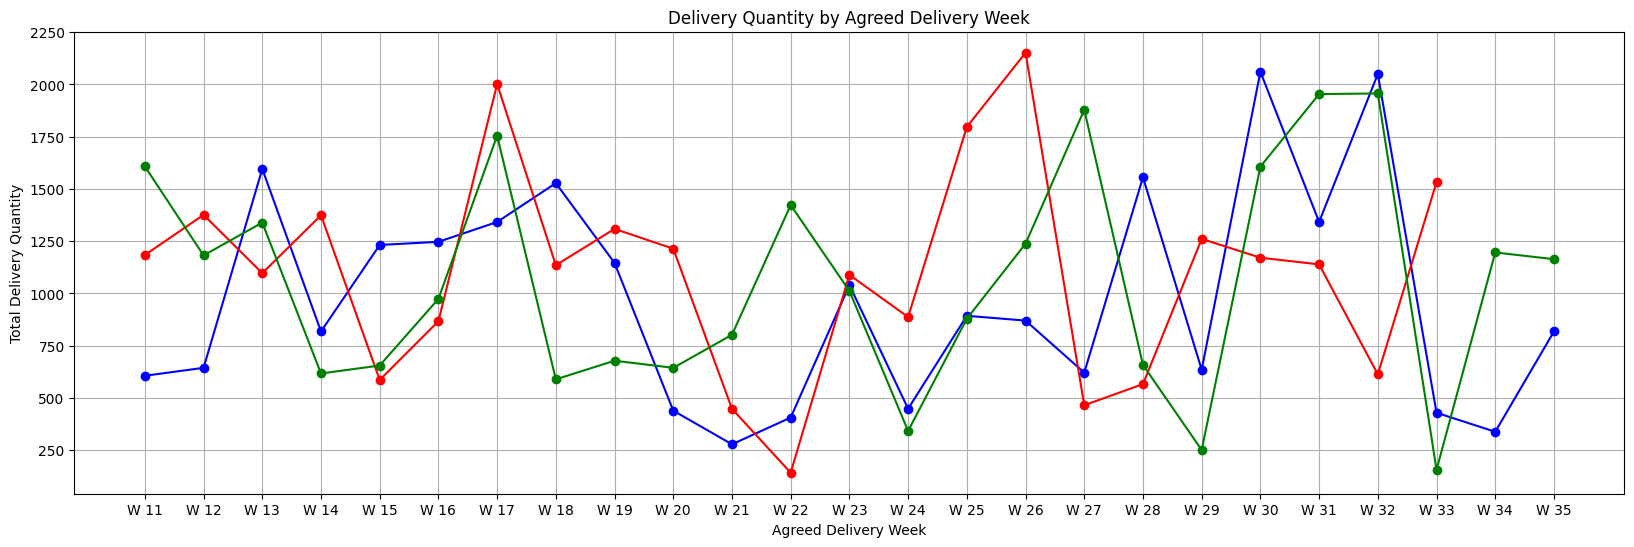

In [129]:
weekly_sum_per_item(dfz1,dfz2,dfz3)

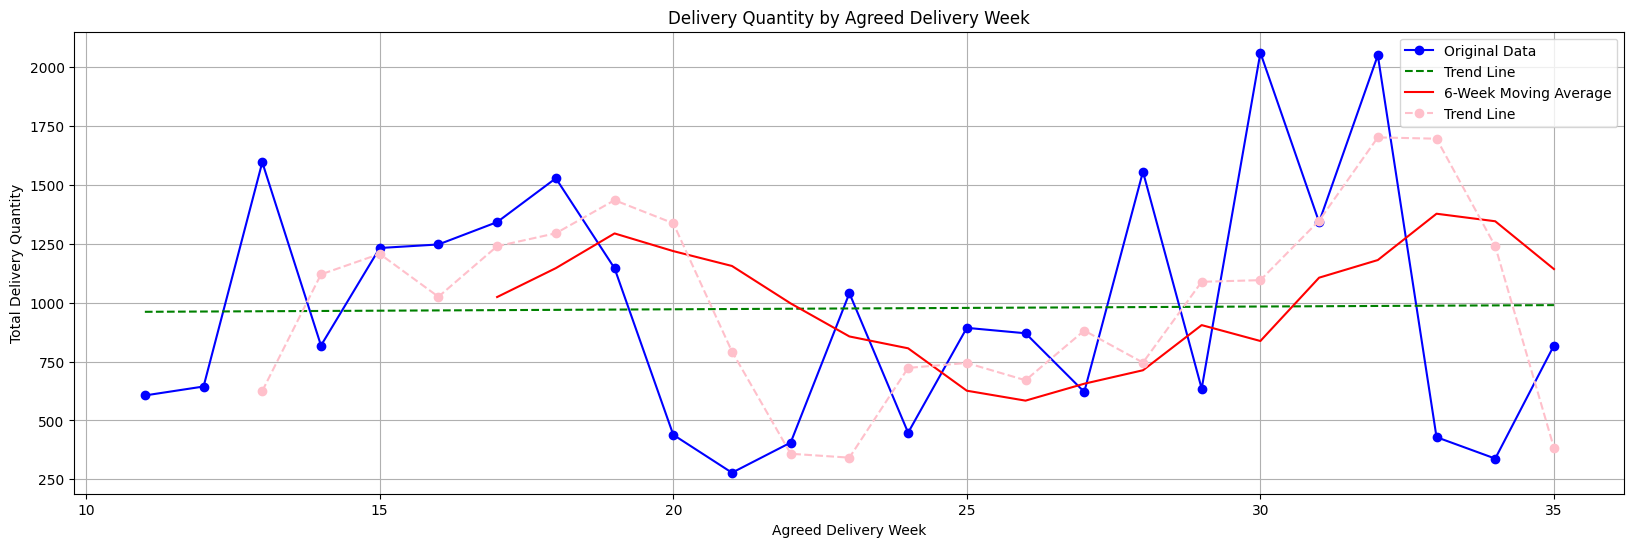

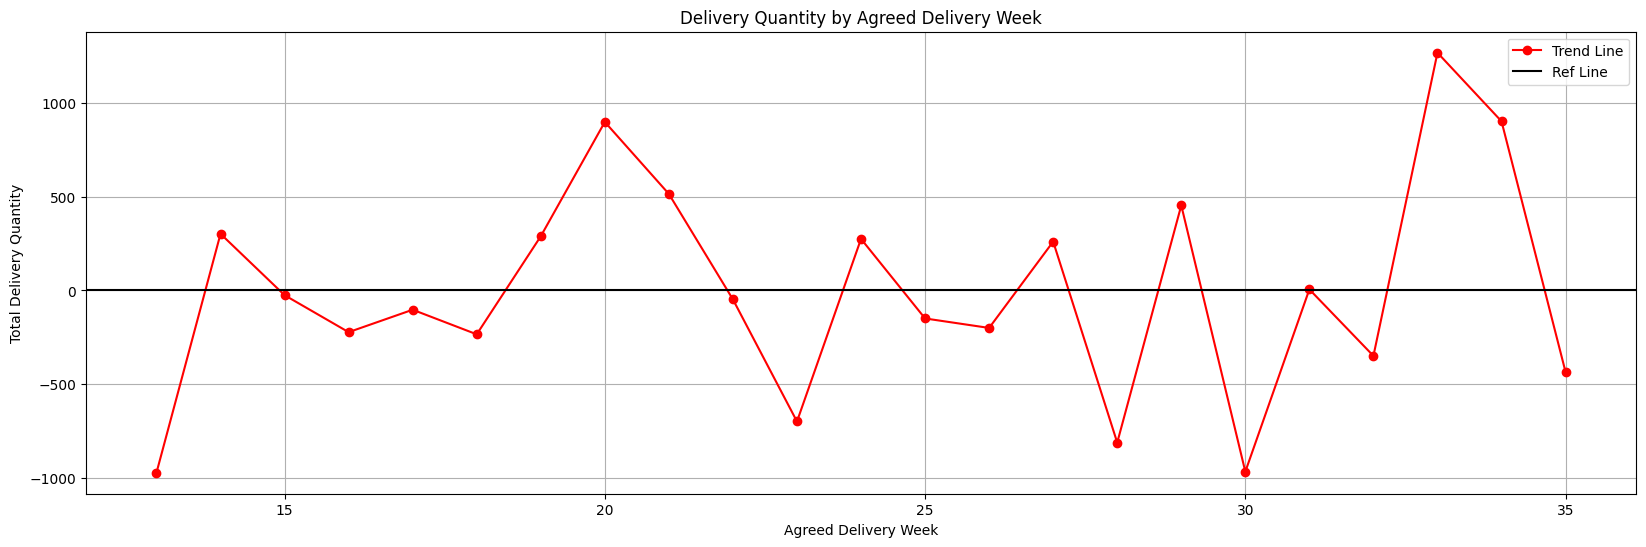

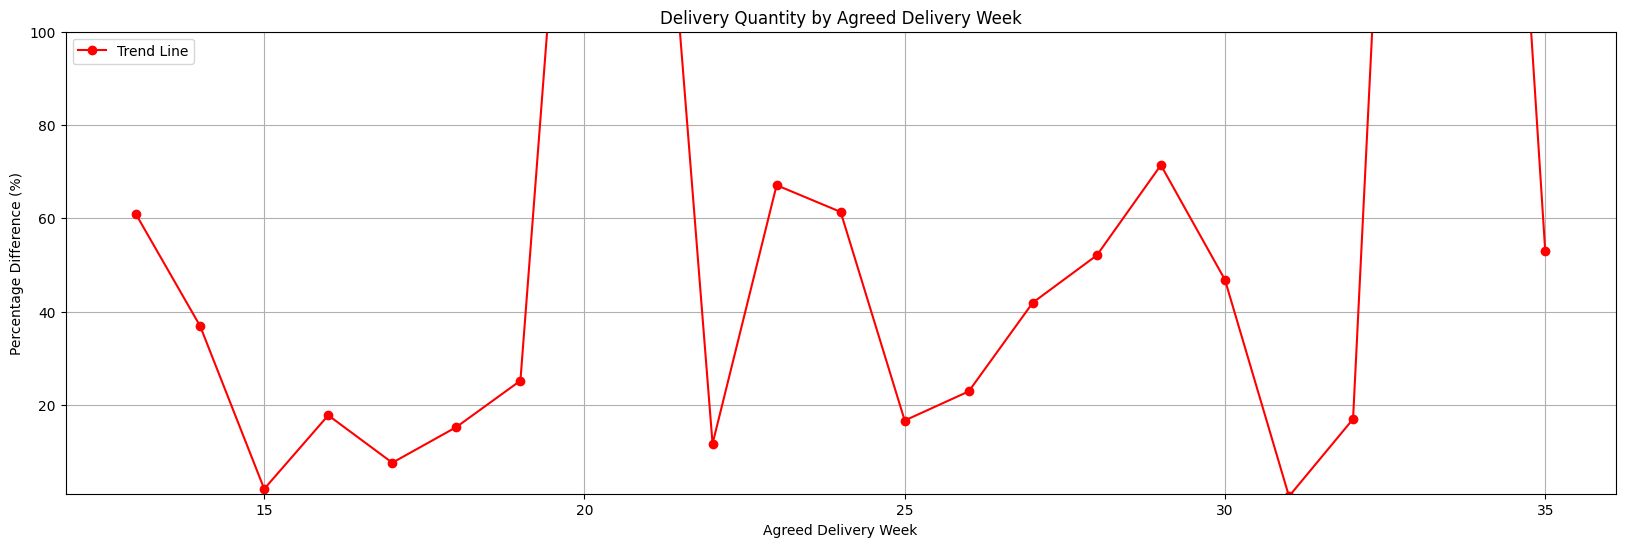

In [130]:
weekly_sum(dfz1)

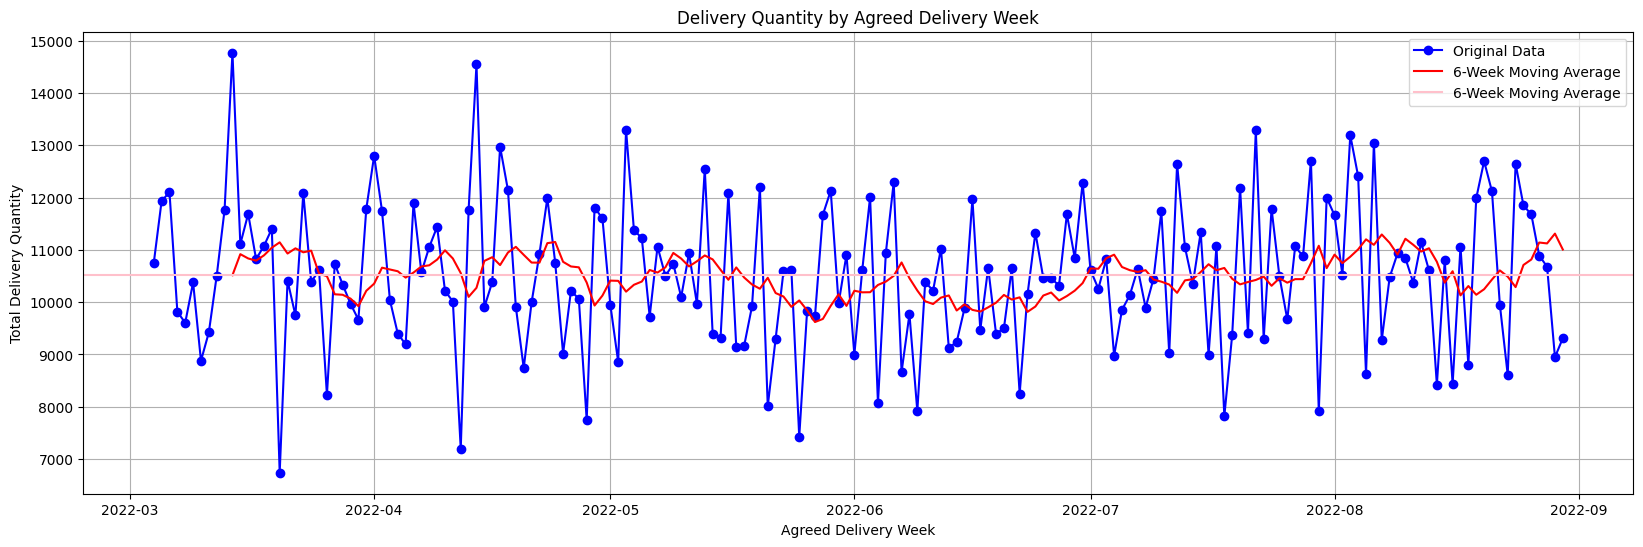

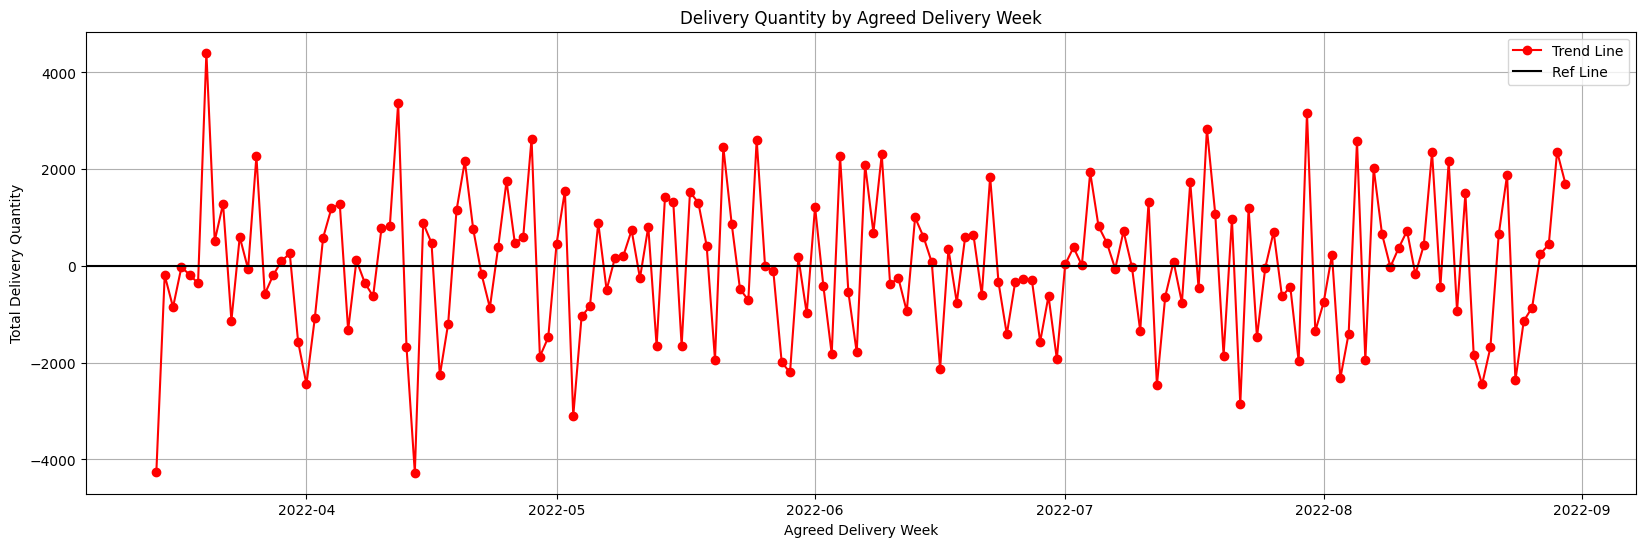

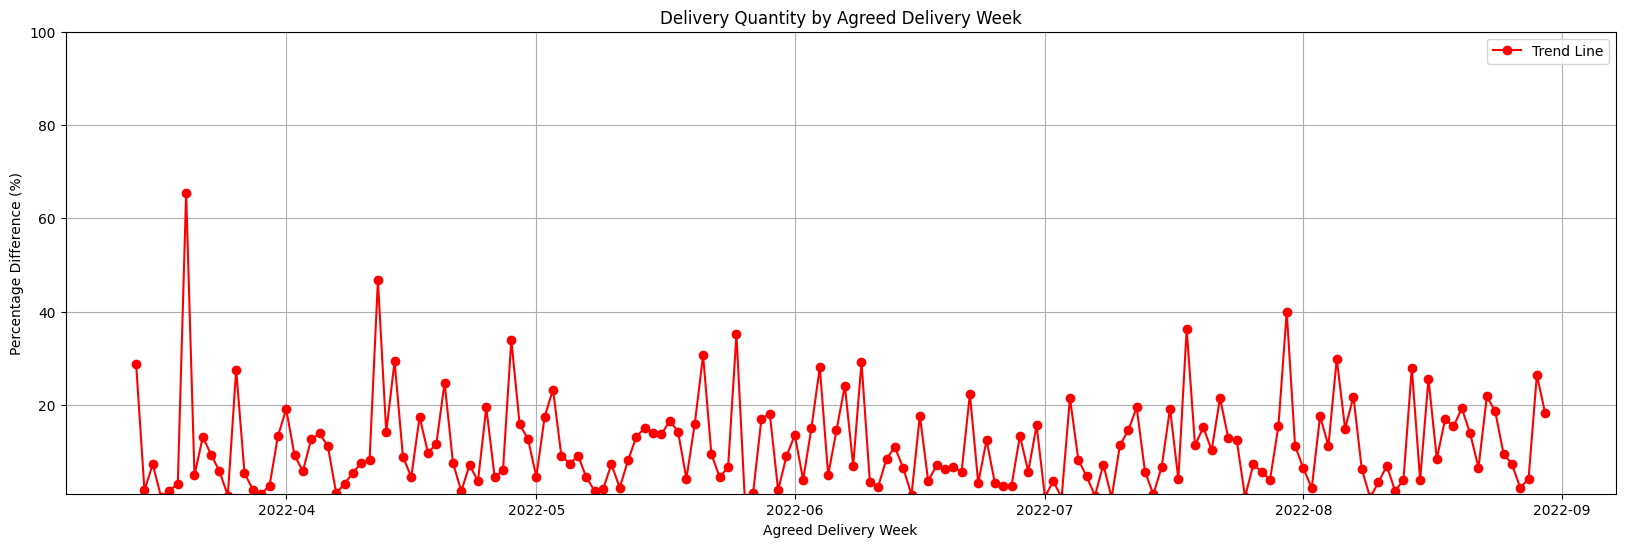

In [131]:
daily_sum(dfz)

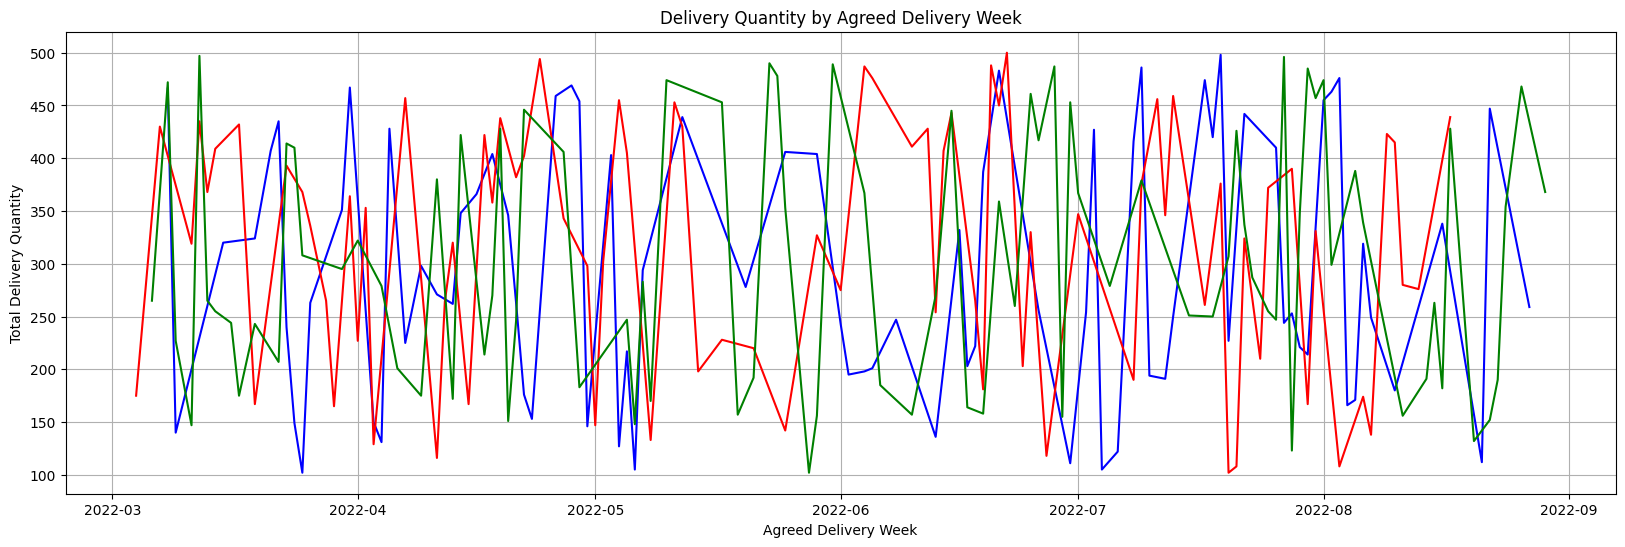

In [132]:
daily_sum_per_item(dfz1,dfz2,dfz3)

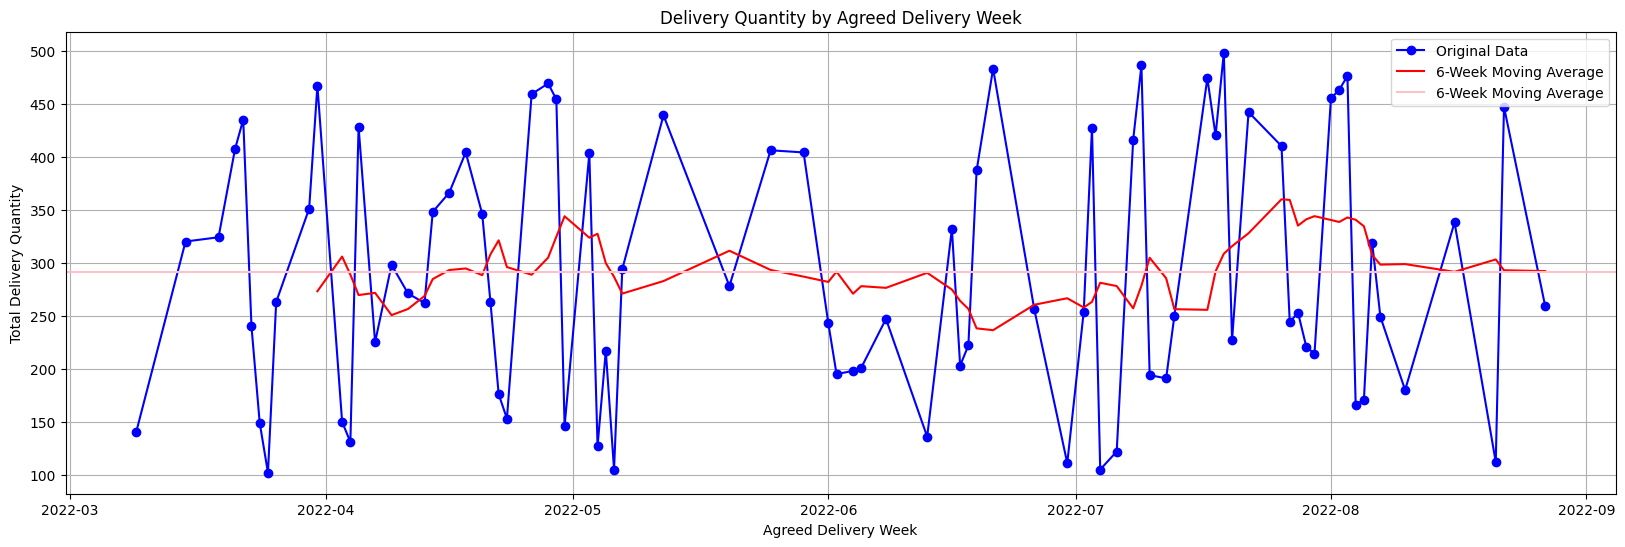

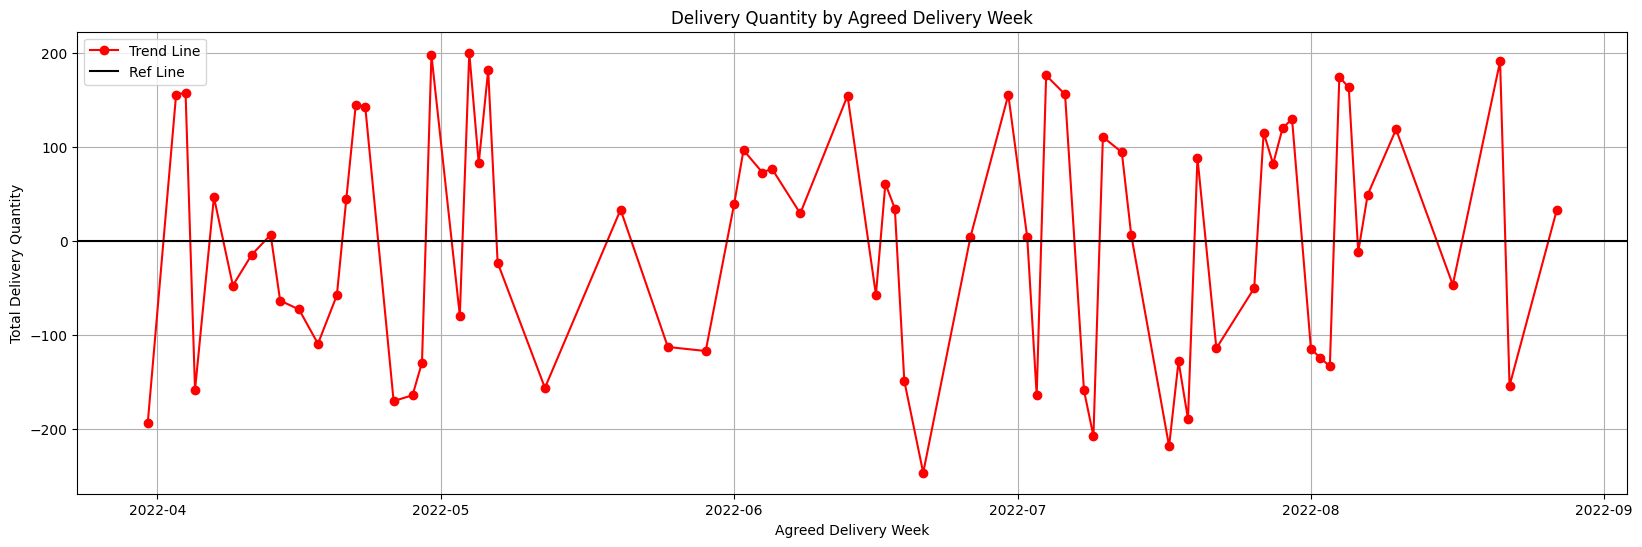

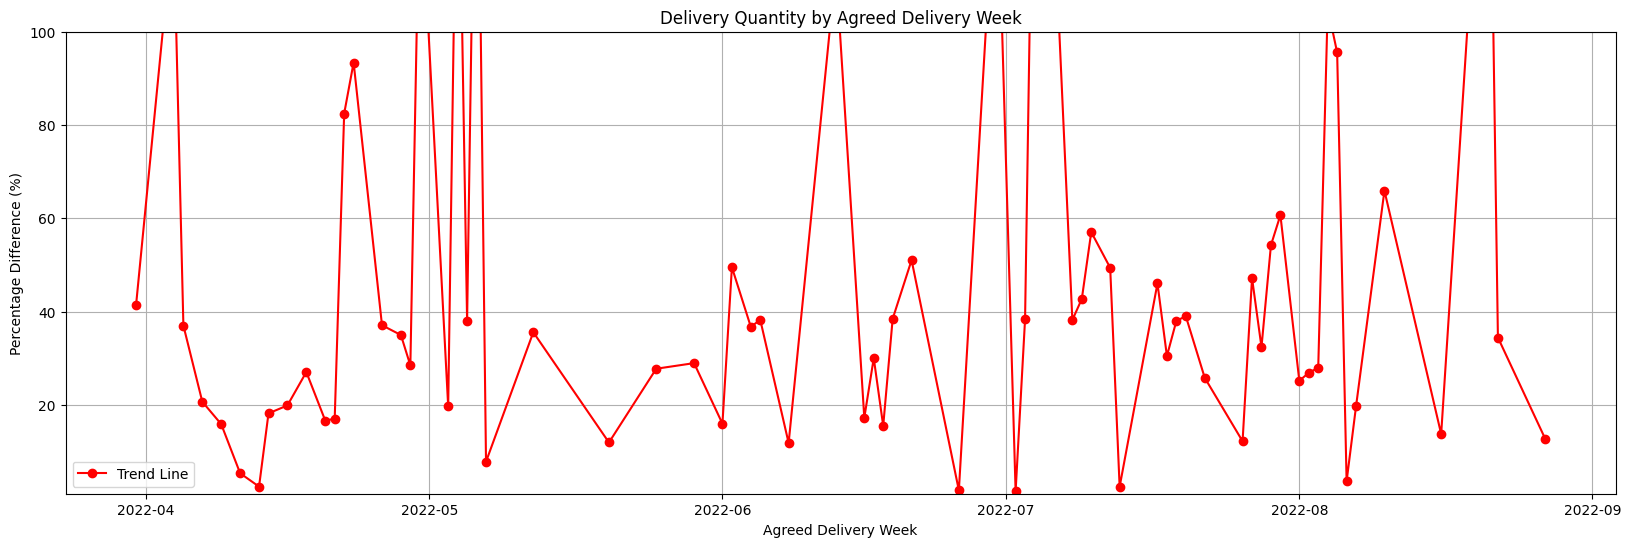

In [133]:
daily_sum(dfz1)